**Auteur** : Viktoriya Zeruk<br>
**Date dernière version** : 18/05/2022<br>

---



<div style="display: flex; background: rgb(75,0,130);
background: linear-gradient(90deg, rgba(75,0,130,1) 47%, rgba(216,191,216,1) 89%, rgba(230,230,250,1) 100%);">
<h2 style="margin: auto; font-weight: bold; padding: 30px 30px 0px 30px;" align="center">Project 4 : Segmentez des clients d'un site e-commerce
 </br>  | Notebook 2 :  Modélisations  | <br>
 (KMeans, DBSCAN, AgglomerativeClustering)<br></h2> </div>    


<div style="display: flex; background: rgb(75,0,130);
background: linear-gradient(90deg, rgba(75,0,130,1) 47%, rgba(216,191,216,1) 89%, rgba(230,230,250,1) 100%);">
<h4 style="margin: auto; font-weight: bold; padding: 30px 30px 0px 30px;" align="center"> _______________________________________________________________________________________________</h4> 
</div>    

---

## Essais de différentes approches de modélisation
Méthodes non supervisées pour regrouper ensemble des clients de profils similaires. Ces catégories pourront être utilisées par l’équipe marketing pour mieux communiquer.

In [5]:
import pandas as pd
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from zipfile import ZipFile
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [6]:
from matplotlib.collections import LineCollection
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import cluster, metrics
from sklearn.cluster import KMeans, DBSCAN, OPTICS, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

In [7]:
pd.options.display.max_rows = 150
pd.options.display.max_columns = 150
plt.style.use('ggplot') 
plt.rcParams.update(
    {
     'figure.figsize': (15, 10),
     'axes.labelsize': 15,
     'axes.titlesize':25,
     'xtick.labelsize':15,
     'ytick.labelsize':15,
     'axes.titleweight':'bold',
     'axes.titleweight':'bold'
    })

In [8]:
olistbr = pd.read_csv('dataset/olist_clean.csv', delimiter=';').set_index('customer_unique_id')
olistbr

average_basket  total_spent  \
customer_unique_id                                              
0000366f3b9a7992bf8c76cfdf3221e2          129.90       141.90   
0000b849f77a49e4a4ce2b2a4ca5be3f           18.90        27.19   
0000f46a3911fa3c0805444483337064           69.00        86.22   
0000f6ccb0745a6a4b88665a16c9f078           25.99        43.62   
0004aac84e0df4da2b147fca70cf8255          180.00       196.89   
...                                          ...          ...   
fffcf5a5ff07b0908bd4e2dbc735a684          785.00      1148.28   
fffea47cd6d3cc0a88bd621562a9d061           64.89        84.58   
ffff371b4d645b6ecea244b27531430a           89.90       112.46   
ffff5962728ec6157033ef9805bacc48          115.00       133.69   
ffffd2657e2aad2907e67c3e9daecbeb           56.99        71.56   

                                  max_order_amount  min_order_amount  \
customer_unique_id                                                     
0000366f3b9a7992bf8c76cfdf3221e2            129.90            129.90   
0000b849f77a49e4a4ce2b2a4ca5be3f             18.90             18.90   
0000f46a3911fa3c0805444483337064             69.00             69.00   
0000f6ccb0745a6a4b88665a16c9f078             25.99             25.99   
0004aac84e0df4da2b147fca70cf8255            180.00            180.00   
...                                            ...               ...   
fffcf5a5ff07b0908bd4e2dbc735a684            890.00            890.00   
fffea47cd6d3cc0a88bd621562a9d061             64.89             64.89   
ffff371b4d645b6ecea244b27531430a             89.90             89.90   
ffff5962728ec6157033ef9805bacc48            115.00            115.00   
ffffd2657e2aad2907e67c3e9daecbeb             56.99             56.99   

                                  number_of_products_purchased  \
customer_unique_id                                               
0000366f3b9a7992bf8c76cfdf3221e2                           1.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                           1.0   
0000f46a3911fa3c0805444483337064                           1.0   
0000f6ccb0745a6a4b88665a16c9f078                           1.0   
0004aac84e0df4da2b147fca70cf8255                           1.0   
...                                                        ...   
fffcf5a5ff07b0908bd4e2dbc735a684                           1.0   
fffea47cd6d3cc0a88bd621562a9d061                           1.0   
ffff371b4d645b6ecea244b27531430a                           1.0   
ffff5962728ec6157033ef9805bacc48                           1.0   
ffffd2657e2aad2907e67c3e9daecbeb                           1.0   

                                  bucket_quartile_lower25  \
customer_unique_id                                          
0000366f3b9a7992bf8c76cfdf3221e2                      0.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                      1.0   
0000f46a3911fa3c0805444483337064                      0.0   
0000f6ccb0745a6a4b88665a16c9f078                      1.0   
0004aac84e0df4da2b147fca70cf8255                      0.0   
...                                                   ...   
fffcf5a5ff07b0908bd4e2dbc735a684                      0.0   
fffea47cd6d3cc0a88bd621562a9d061                      0.0   
ffff371b4d645b6ecea244b27531430a                      0.0   
ffff5962728ec6157033ef9805bacc48                      0.0   
ffffd2657e2aad2907e67c3e9daecbeb                      0.0   

                                  bucket_quartile_25_50  \
customer_unique_id                                        
0000366f3b9a7992bf8c76cfdf3221e2                    0.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                    0.0   
0000f46a3911fa3c0805444483337064                    1.0   
0000f6ccb0745a6a4b88665a16c9f078                    0.0   
0004aac84e0df4da2b147fca70cf8255                    0.0   
...                                                 ...   
fffcf5a5ff07b0908bd4e2dbc735a684                    0.0   
fffea47cd6d3cc0a88bd621562a9d061                    1.0   
ffff371b

In [9]:
olistbr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93605 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   average_basket                93605 non-null  float64
 1   total_spent                   93605 non-null  float64
 2   max_order_amount              93605 non-null  float64
 3   min_order_amount              93605 non-null  float64
 4   number_of_products_purchased  93605 non-null  float64
 5   bucket_quartile_lower25       93605 non-null  float64
 6   bucket_quartile_25_50         93605 non-null  float64
 7   bucket_quartile_50_75         93605 non-null  float64
 8   bucket_quartile_upper75       93605 non-null  float64
 9   payment_boleto                93605 non-null  float64
 10  payment_credit_card           93605 non-null  float64
 11  payment_debit_card            93605 non-null  float64
 12  payment

In [10]:
olistbr.describe()

average_basket   total_spent  max_order_amount  min_order_amount  \
count    93605.000000  93605.000000      93605.000000      93605.000000   
mean       126.335502    146.718385        126.442726        126.442726   
std        190.492372    198.467519        191.173504        191.173504   
min          0.850000      6.080000          0.850000          0.850000   
25%         42.950000     57.600000         42.000000         42.000000   
50%         79.000000     96.320000         79.000000         79.000000   
75%        139.900000    163.580000        139.900000        139.900000   
max       6735.000000   6929.310000       6735.000000       6735.000000   

       number_of_products_purchased  bucket_quartile_lower25  \
count                       93605.0             93605.000000   
mean                            1.0                 0.249239   
std                             0.0                 0.432575   
min                             1.0                 0.000000   
25%                             1.0                 0.000000   
50%                             1.0                 0.000000   
75%                             1.0                 0.000000   
max                             1.0                 1.000000   

       bucket_quartile_25_50  bucket_quartile_50_75  bucket_quartile_upper75  \
count           93605.000000           93605.000000             93605.000000   
mean                0.251076               0.248993                 0.250638   
std                 0.433635               0.432432                 0.433383   
min                 0.000000               0.000000                 0.000000   
25%                 0.000000               0.000000                 0.000000   
50%                 0.000000               0.000000                 0.000000   
75%                 1.000000               0.000000                 1.000000   
max                 1.000000               1.000000                 1.000000   

       payment_boleto  payment_credit_card  payment_debit_card  \
count    93605.000000         93605.000000        93605.000000   
mean         0.199263             0.773025            0.015448   
std          0.399448             0.425885            0.123413   
min          0.000000             0.000000            0.000000   
25%          0.000000             1.000000            0.000000   
50%          0.000000             1.000000            0.000000   
75%          0.000000             1.000000            0.000000   
max          1.000000             2.000000            2.000000   

       payment_voucher    appliances          auto  construction  \
count     93605.000000  93605.000000  93605.000000  93605.000000   
mean          0.056087      8.113874      5.714106      3.620372   
std           0.410192     65.948217     51.705677     42.154614   
min           0.000000      0.000000      0.000000      0.000000   
25%           0.000000      0.000000      0.000000      0.000000   
50%           0.000000      0.000000      0.000000      0.000000   
75%           0.000000      0.000000      0.000000      0.000000   
max          29.000000   6735.000000   2258.000000   3099.900000   

            culture   electronics       fashion          food        garden  \
count  93605.000000  93605.000000  93605.000000  93605.000000  93605.000000   
mean       1.134748     17.331229     14.014532      0.579879      4.466273   
std       25.940659     95.130647     81.488114      8.182706     48.282946   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max     6499.000000   6729.000000   3999.900000    699.900000   3930.000000   

       health_beauty       hobbies          home        office        others  \
count   93605.000000  93605.00000

# Modélisations

### Normalisation et encodage des données
L'échantillon est composé de plusieurs variables avec des différences d'échelle. Il est donc nécessaire de traiter ces écarts pour ne pas biaiser les modélisations. 

In [11]:
X = olistbr.copy()

categorical_columns = X.select_dtypes('object').columns
numerical_columns = X.drop(columns=categorical_columns).columns

scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

encoder = OneHotEncoder(sparse=False)
X_categorical = encoder.fit_transform(X[categorical_columns])
X = pd.merge(X[numerical_columns], 
             pd.DataFrame(data = X_categorical, 
                          columns = encoder.get_feature_names(['state'])).set_index(X.index),
                          left_index = True, right_index = True, how='left')
X.drop_duplicates(inplace=True)

X.name = "X"
X.shape

c:\Python3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(93036, 38)

### Échantillon d'essai
Afin d'optimiser les temps de calcul des différentes pistes de modélisation, un échantillon de 10000 individus sera pris comme population test. La méthode .sample() permet une sélection au hasard des individus…


In [12]:
X_sample = X.copy()
X_sample = X_sample.sample(n=10000)
X_sample.name = "X_sample"
X_sample.shape

(10000, 38)

In [13]:
display(X_sample.duplicated().sum().sum())
display(X_sample.isna().sum().sum())

0

0

### Décomposition PCA
L'ACP (*Analyse en Composantes Principales*) permettra une visualisation plus simple des clusters sur le premier plan factoriel (ou plus).

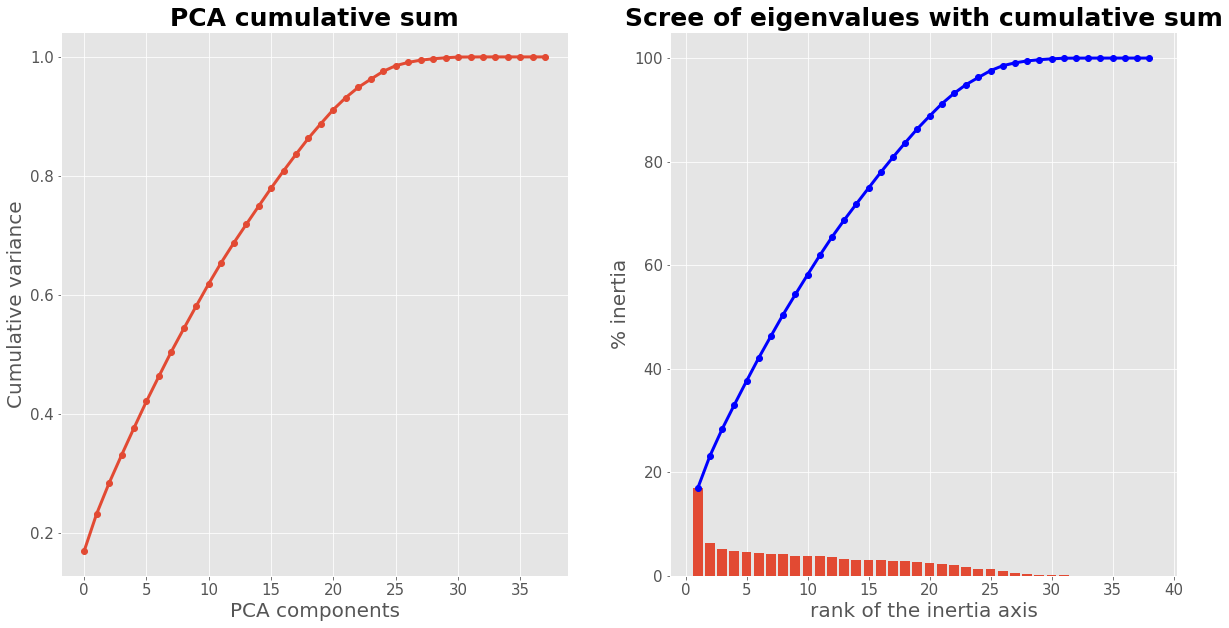

In [14]:
def pca_eigenvalues(X):
    '''PCA plot and scree of eigenvalues with cumulative sum.'''
    pca = PCA(svd_solver='full').fit(X)

    plt.figure(figsize=(20,10))
    plt.subplot(121)
    plt.plot(list(range(X.shape[1])), pca.explained_variance_ratio_.cumsum(),marker='o', linewidth=3)
    plt.xlabel('PCA components', fontsize=20)
    plt.ylabel('Cumulative variance', fontsize=20)
    plt.title('PCA cumulative sum', fontsize=25)

    plt.subplot(122)
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="blue",marker='o', linewidth=3)  
    plt.xlabel('rank of the inertia axis', fontsize=20)
    plt.ylabel('% inertia', fontsize=20)
    plt.title("Scree of eigenvalues with cumulative sum", fontsize=25)
    plt.show()
    
pca_eigenvalues(X_sample)

In [15]:
pca = PCA(n_components=20).fit(X_sample)
pca.explained_variance_ratio_.cumsum()

array([0.16917216, 0.23165079, 0.28335945, 0.33034145, 0.37618475,
       0.4209319 , 0.46311083, 0.50462609, 0.54342426, 0.5814511 ,
       0.61877056, 0.6542001 , 0.68704963, 0.7182535 , 0.74897176,
       0.77938051, 0.80842101, 0.83634197, 0.86341716, 0.88797003])

Le premier plan factoriel permet d'expliquer près de 28% de la variance. On peut expliquer 90% de la variance en prenant en compte 20 composantes. Notons que si n_components > 27, la variance ne progresse plus, les 100% sont atteint.

In [16]:
def eigenvalues_variance(X):
    '''eigenvalues, explained variances and cumulative explained variance.'''
    
    pca = PCA(svd_solver='full').fit(X)
    
    eig = pd.DataFrame(
        {
            "axe" : ["F" + str(x + 1) for x in range(shape(X)[1])], 
            "eigenvalues" : pca.explained_variance_,
            "%explained_variance" : np.round(pca.explained_variance_ratio_ * 100),
            "%cumulative_explained_variance" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
        },
        columns = ["axe", "eigenvalues", "%explained_variance", "%cumulative_explained_variance"])
    return eig

eigenvalues_variance(X_sample)

axe   eigenvalues  %explained_variance  %cumulative_explained_variance
0    F1  5.404040e+00                 17.0                            17.0
1    F2  1.995819e+00                  6.0                            23.0
2    F3  1.651783e+00                  5.0                            28.0
3    F4  1.500794e+00                  5.0                            33.0
4    F5  1.464420e+00                  5.0                            38.0
5    F6  1.429404e+00                  4.0                            42.0
6    F7  1.347365e+00                  4.0                            46.0
7    F8  1.326164e+00                  4.0                            50.0
8    F9  1.239370e+00                  4.0                            54.0
9   F10  1.214731e+00                  4.0                            58.0
10  F11  1.192134e+00                  4.0                            62.0
11  F12  1.131762e+00                  4.0                            65.0
12  F13  1.049346e+00                  3.0                            69.0
13  F14  9.967775e-01                  3.0                            72.0
14  F15  9.812647e-01                  3.0                            75.0
15  F16  9.713779e-01                  3.0                            78.0
16  F17  9.276706e-01                  3.0                            81.0
17  F18  8.919078e-01                  3.0                            84.0
18  F19  8.648906e-01                  3.0                            86.0
19  F20  7.843177e-01                  2.0                            89.0
20  F21  7.542540e-01                  2.0                            91.0
21  F22  6.439697e-01                  2.0                            93.0
22  F23  5.477244e-01                  2.0                            95.0
23  F24  4.363801e-01                  1.0                            96.0
24  F25  4.218614e-01                  1.0                            98.0
25  F26  3.048841e-01                  1.0                            99.0
26  F27  1.738311e-01                  1.0                            99.0
27  F28  1.219941e-01                  0.0                            99.0
28  F29  7.156051e-02                  0.0                           100.0
29  F30  5.465081e-02                  0.0                           100.0
30  F31  3.949212e-02                  0.0                           100.0
31  F32  4.966641e-03                  0.0                           100.0
32  F33  2.986321e-03                  0.0                           100.0
33  F34  1.332025e-04                  0.0                           100.0
34  F35  1.065759e-30                  0.0                           100.0
35  F36  4.409664e-31                  0.0                           100.0
36  F37  4.261431e-32                  0.0                           100.0
37  F38  4.261431e-32                  0.0                           100.0

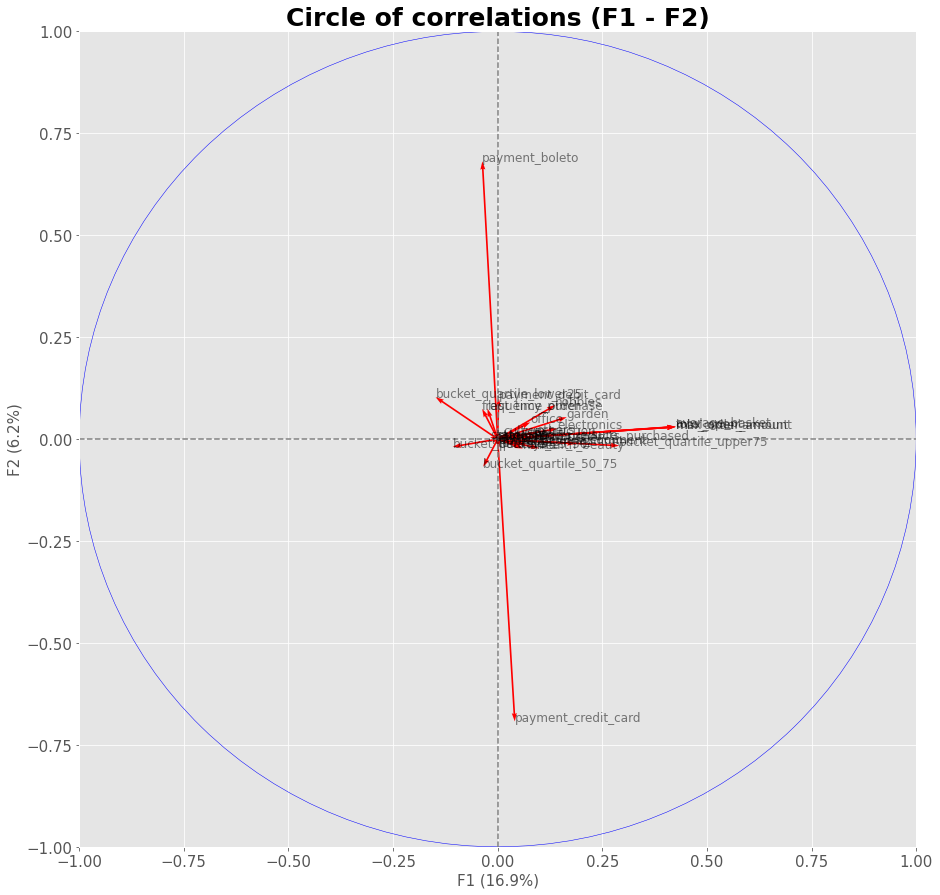

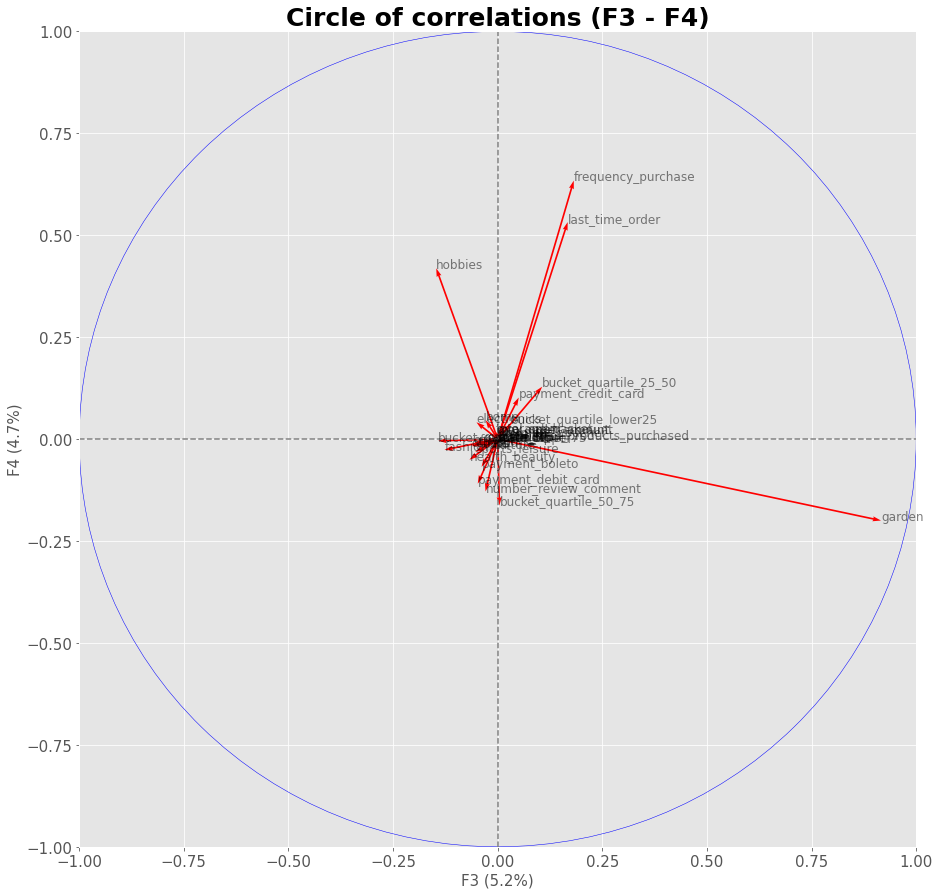

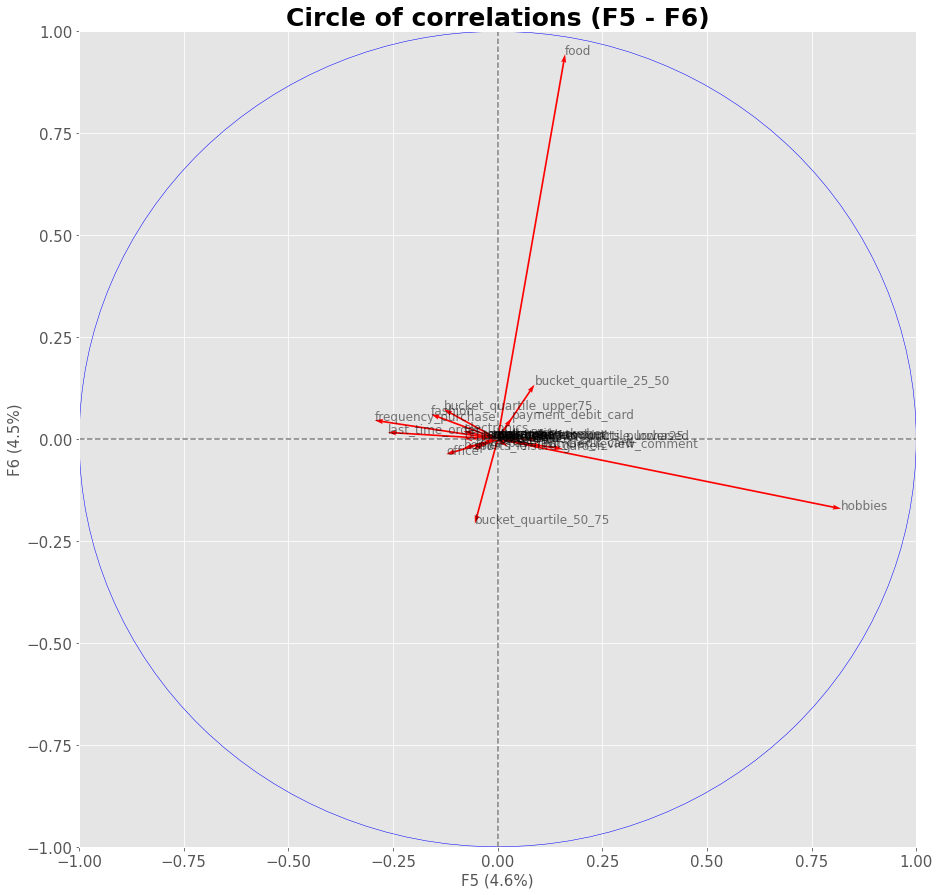

In [17]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    '''Circles of correlations with several factorial plans.'''

    for d1, d2 in axis_ranks: 
        if d2 < n_comp:

            fig, ax = plt.subplots(figsize=(15,15))

            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 45 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            if pcs.shape[1] < 45 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="r", width=0.002)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='12', rotation=label_rotation, color="black", alpha=0.5)
            
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)

        
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Circle of correlations (F{} - F{})".format(d1+1, d2+1))
        plt.show(block=False)

display_circles(pcs=pca.components_, n_comp=6, pca=pca, axis_ranks=[(0,1),(2,3),(4,5)], 
                labels=X_sample.columns, label_rotation=0, lims=None)

Ici l'utilité d'une projection sur les premiers plans factoriels n'est pas source d'information. Un grand nombre de features sont plus ou moins représentés selon les composantes. Par exemple, sur F6 les clients dont l'intérêt est particulièrement porté sur des produits de beauté du corps sont très bien représentés. Seulement cet axe n'explique que 4% de la variance, on pourrait l'assimiler à une niche de clients.

Mais ici dans le contexte métier, le grand nombre de features ne rend pas l'expression faite par les cercles des corrélations explicite, l'utilité de l'ACP reste néanmoins essentielle pour la phase de réduction dimensionnelle.

**Les essais des différentes approches de modélisation seront exploités sur les algorithmes du Kmeans, AgglomerativeClustering et DBSCAN.**

# Modélisation Kmeans
Il est impératif de déterminer le k optimal, le but étant de pouvoir identifier le nombre de clusters le plus adapté aux données de l'échantillon.

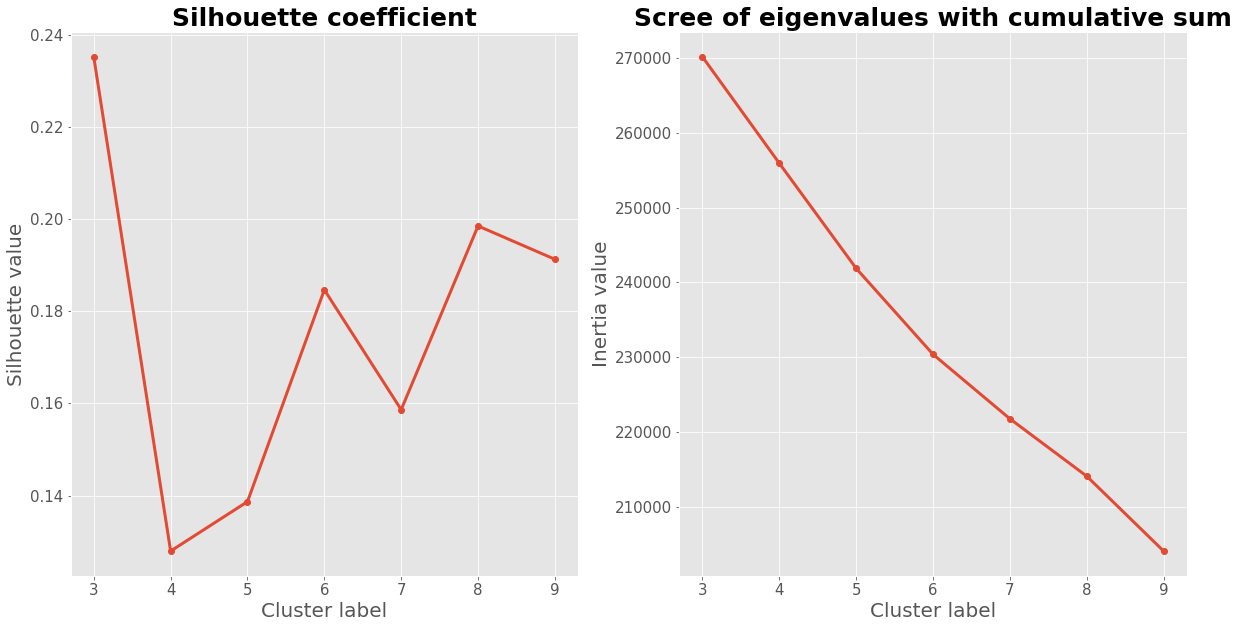

Time: 21.993 seconds


In [18]:
def silhouette_inertia(X):
    '''Silhouette coefficient and Inertia values plots. Manage clusters labels…'''
    
    start_time = time.time()
    plt.figure(figsize=(20,10))
    silhouettes = [] 
    inerties=[]

    plt.subplot(121)
    for k in range(3,10): 
        km = KMeans(n_clusters=k)  
        km.fit(X)
        silh = metrics.silhouette_score(X, km.labels_)
        silhouettes.append(silh) 
    plt.plot(range(3,10), silhouettes, marker='o', linewidth=3)
    plt.xlabel('Cluster label', fontsize=20)
    plt.ylabel('Silhouette value', fontsize=20)
    plt.title("Silhouette coefficient", fontsize=25)

    plt.subplot(122)
    for k in range(3,10):
        km = KMeans(n_clusters=k)
        km.fit(X)
        inerties.append(km.inertia_)
    plt.plot(range(3,10), inerties, marker='o', linewidth=3)
    plt.xlabel('Cluster label', fontsize=20)
    plt.ylabel('Inertia value', fontsize=20)
    plt.title("Scree of eigenvalues with cumulative sum", fontsize=25)
    
    plt.show()
    print("Time: {} seconds".format(round(time.time() - start_time, 3)))
    
silhouette_inertia(X_sample)

Le nombre de cluster optimal est estimé à k=3, la silhouette est supérieur à 0.22, mais un clustering en k=4 peut également être intéressant. L'interprétabilité business peut en effet s'avérer plus facile et plus détaillée en 4 clusters plutôt que 3, il est donc utile d'estimer les deux.

### Quelques fonctions utiles à l'analyse…

In [19]:
def kmeans_model(X, k, folder):
    '''Kmeans Model and save in folder.'''
    start_time = time.time()
    model_kms = KMeans(n_clusters=k)  
    model_kms.fit(X)
    
    filename = str(model_kms).split('(')[0]
    pickle.dump(model_kms, open(folder + filename + str(k) + '_' + str(X.name) + '.pkl', 'wb'))
    print("Time: {} seconds".format(round(time.time() - start_time, 3)))
    
    return model_kms.fit(X)

In [20]:
def kmeans_clustering_pca(X, k, get_model, get_folder, add_title):
    '''Projection Kmeans Model on the first factorial plane with percentage distribution clusters.'''
    model_kms = pickle.load(open(get_folder + '/' + get_model + '.pkl', 'rb'))
    
    start_time = time.time()
    pca = PCA(svd_solver = 'full').fit(X)
    X_projected = pca.transform(X)

    plt.figure(figsize=(20, 10))
    sns.scatterplot(X_projected[:,0], X_projected[:,1], 
                    hue = model_kms.labels_,
                    palette = 'Set1',
                    s=100, alpha=0.2).set_title('PCA - KMeans Clusters('+ str(k) +') ' + add_title, fontsize=30)
    
    ax, fig = plt.subplots(figsize=(20,6)) 
    clusters = pd.DataFrame(model_kms.labels_, columns=['cluster'])
    ax = sns.countplot(data=clusters, y='cluster', palette = 'Set1', alpha=.8, 
                       order=clusters['cluster'].value_counts(sort=False).index, orient='h')

    for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/len(clusters))
            x = p.get_x() + p.get_width()
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y), fontsize=15)

    ax.set_title('Kmeans Clusters('+ str(k) +') ' + add_title)
    
    
    print("KMeans Silhouette Score: {}".format(round(metrics.silhouette_score(X_projected, 
                                               model_kms.labels_, metric='euclidean'), 3)))
    print("Time pca plot: {} seconds".format(round(time.time() - start_time, 3)))
    
    show()

In [21]:
def kmeans_clustering_tsne(X, k, get_model, get_folder, add_title):
    '''Cluster visualization on T-sne.'''
    start_time = time.time()
    model_kms = pickle.load(open(get_folder + '/' + get_model + '.pkl', 'rb'))
    plt.figure(figsize=(12,12))
    sns.scatterplot(T[:,0], T[:,1], hue = model_kms.labels_, palette = 'Set1')
    plt.title('TSNE - KMeans Clusters('+ str(k) +') ' + add_title, fontsize=20)
    show()
    
    print("Time TSNE plot: {} seconds".format(round(time.time() - start_time, 3)))

In [22]:
def centroids_cls(X, get_model, get_folder):
    '''Centroid approach according to feature / cluster.'''
    model_kms = pickle.load(open(get_folder + '/' + get_model + '.pkl', 'rb'))

    idk = np.argsort(model_kms.labels_)

    X_cls = pd.DataFrame(X.index[idk], model_kms.labels_[idk]).reset_index()
    X_cls = X_cls.rename(columns={'index':'cluster'})
    X_cls = pd.merge(X, X_cls, on='customer_unique_id').set_index('customer_unique_id')
    
    centroids = model_kms.cluster_centers_
    centroids = pd.DataFrame(centroids, columns=X.columns)
    
    return X_cls, centroids

In [23]:
def data_cls(X, get_model, get_folder):
    '''Integration of cluster identifiers.'''
    model_kms = pickle.load(open(get_folder + '/' + get_model + '.pkl', 'rb'))

    idk = np.argsort(model_kms.labels_)

    X_cls = pd.DataFrame(X.index[idk], model_kms.labels_[idk]).reset_index()
    X_cls = X_cls.rename(columns={'index':'cluster'})
    X_cls = pd.merge(X, X_cls, left_index=True, right_on='customer_unique_id').set_index('customer_unique_id')
    
    return X_cls

In [24]:
def features_kmeans(X, view_features, get_model, get_folder):
    '''Visualization of some features.'''
    model_kms = pickle.load(open(get_folder + '/' + get_model + '.pkl', 'rb'))
    X_centroids = centroids_cls(X, get_model, get_folder)[0]
    plt.figure(figsize=(20, 100))
    i=1
    for var in X.columns : 
        if var in view_features:
            plt.subplot(20,2,i)
            sns.boxplot(data=X_centroids, x='cluster', y=var, palette="Set1", saturation=.8)
            plt.title(var)
            plt.ylabel('')
            plt.tight_layout()
            i+=1
    show()

In [25]:
kmeans_model(X=X_sample, k=3, folder='model/')

Time: 0.201 seconds


KMeans(n_clusters=3)

c:\Python3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


KMeans Silhouette Score: 0.129
Time pca plot: 2.819 seconds


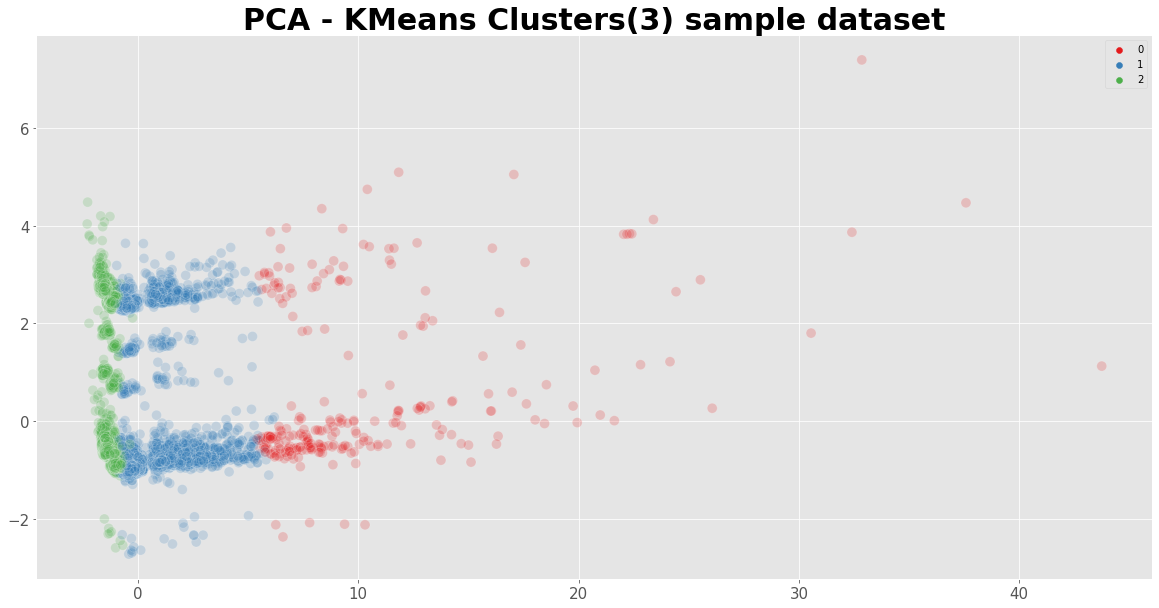

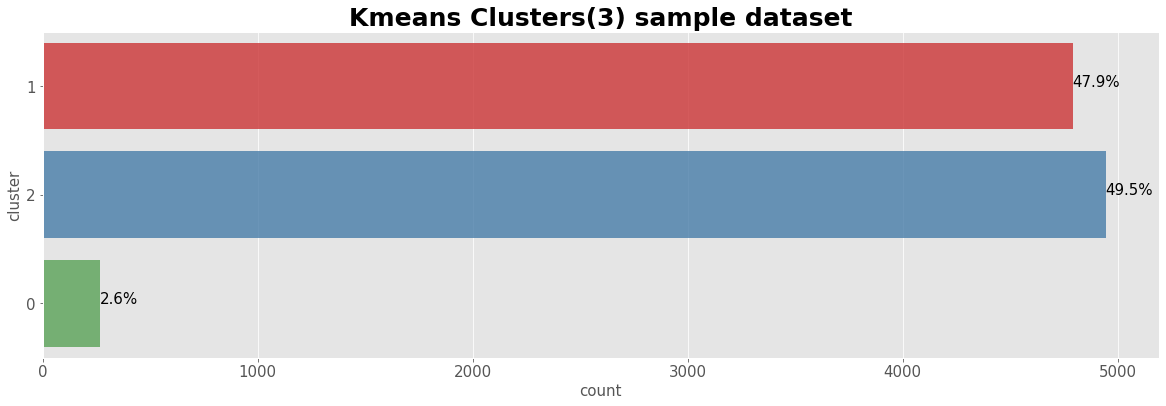

In [26]:
kmeans_clustering_pca(X_sample, k=3, get_model='KMeans3_X_sample', get_folder='model/', 
                      add_title='sample dataset')

Les clusters ne sont pas tous de taille équivalente, une forte supériorité de l'activité est facilement identifiée avec un cluster à plus de 70%.\
**Le partitionnement en 4 clusters pourra peut-être apporter une valeur ajoutée en termes  d'interprétation métier.**

In [27]:
#t-SNE (t-Stochastic Neighbour Embedding)
tsne = TSNE(n_components=2)
T = tsne.fit_transform(X_sample)

c:\Python3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Python3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


c:\Python3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


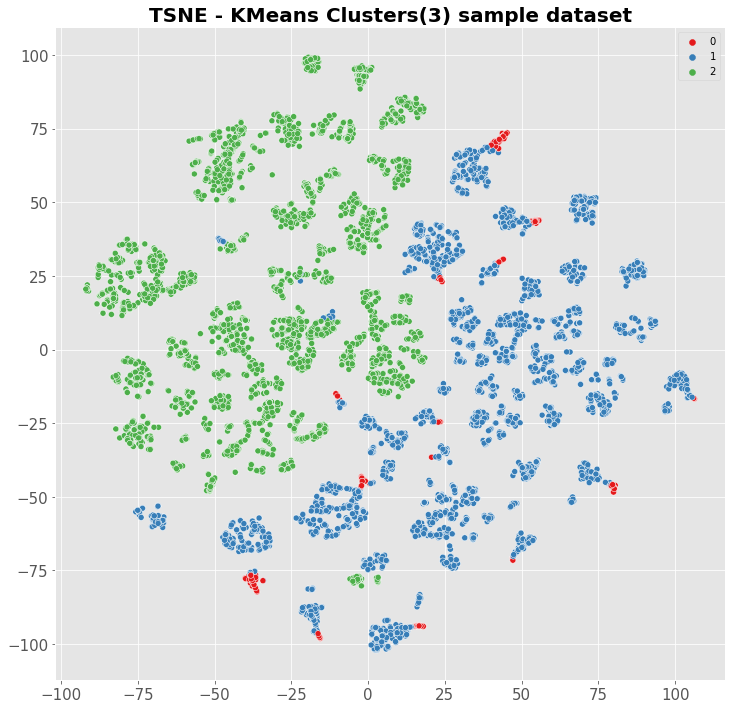

Time TSNE plot: 0.789 seconds


In [28]:
kmeans_clustering_tsne(X_sample, k=3, get_model='KMeans3_X_sample', get_folder='model/',
                       add_title='sample dataset')

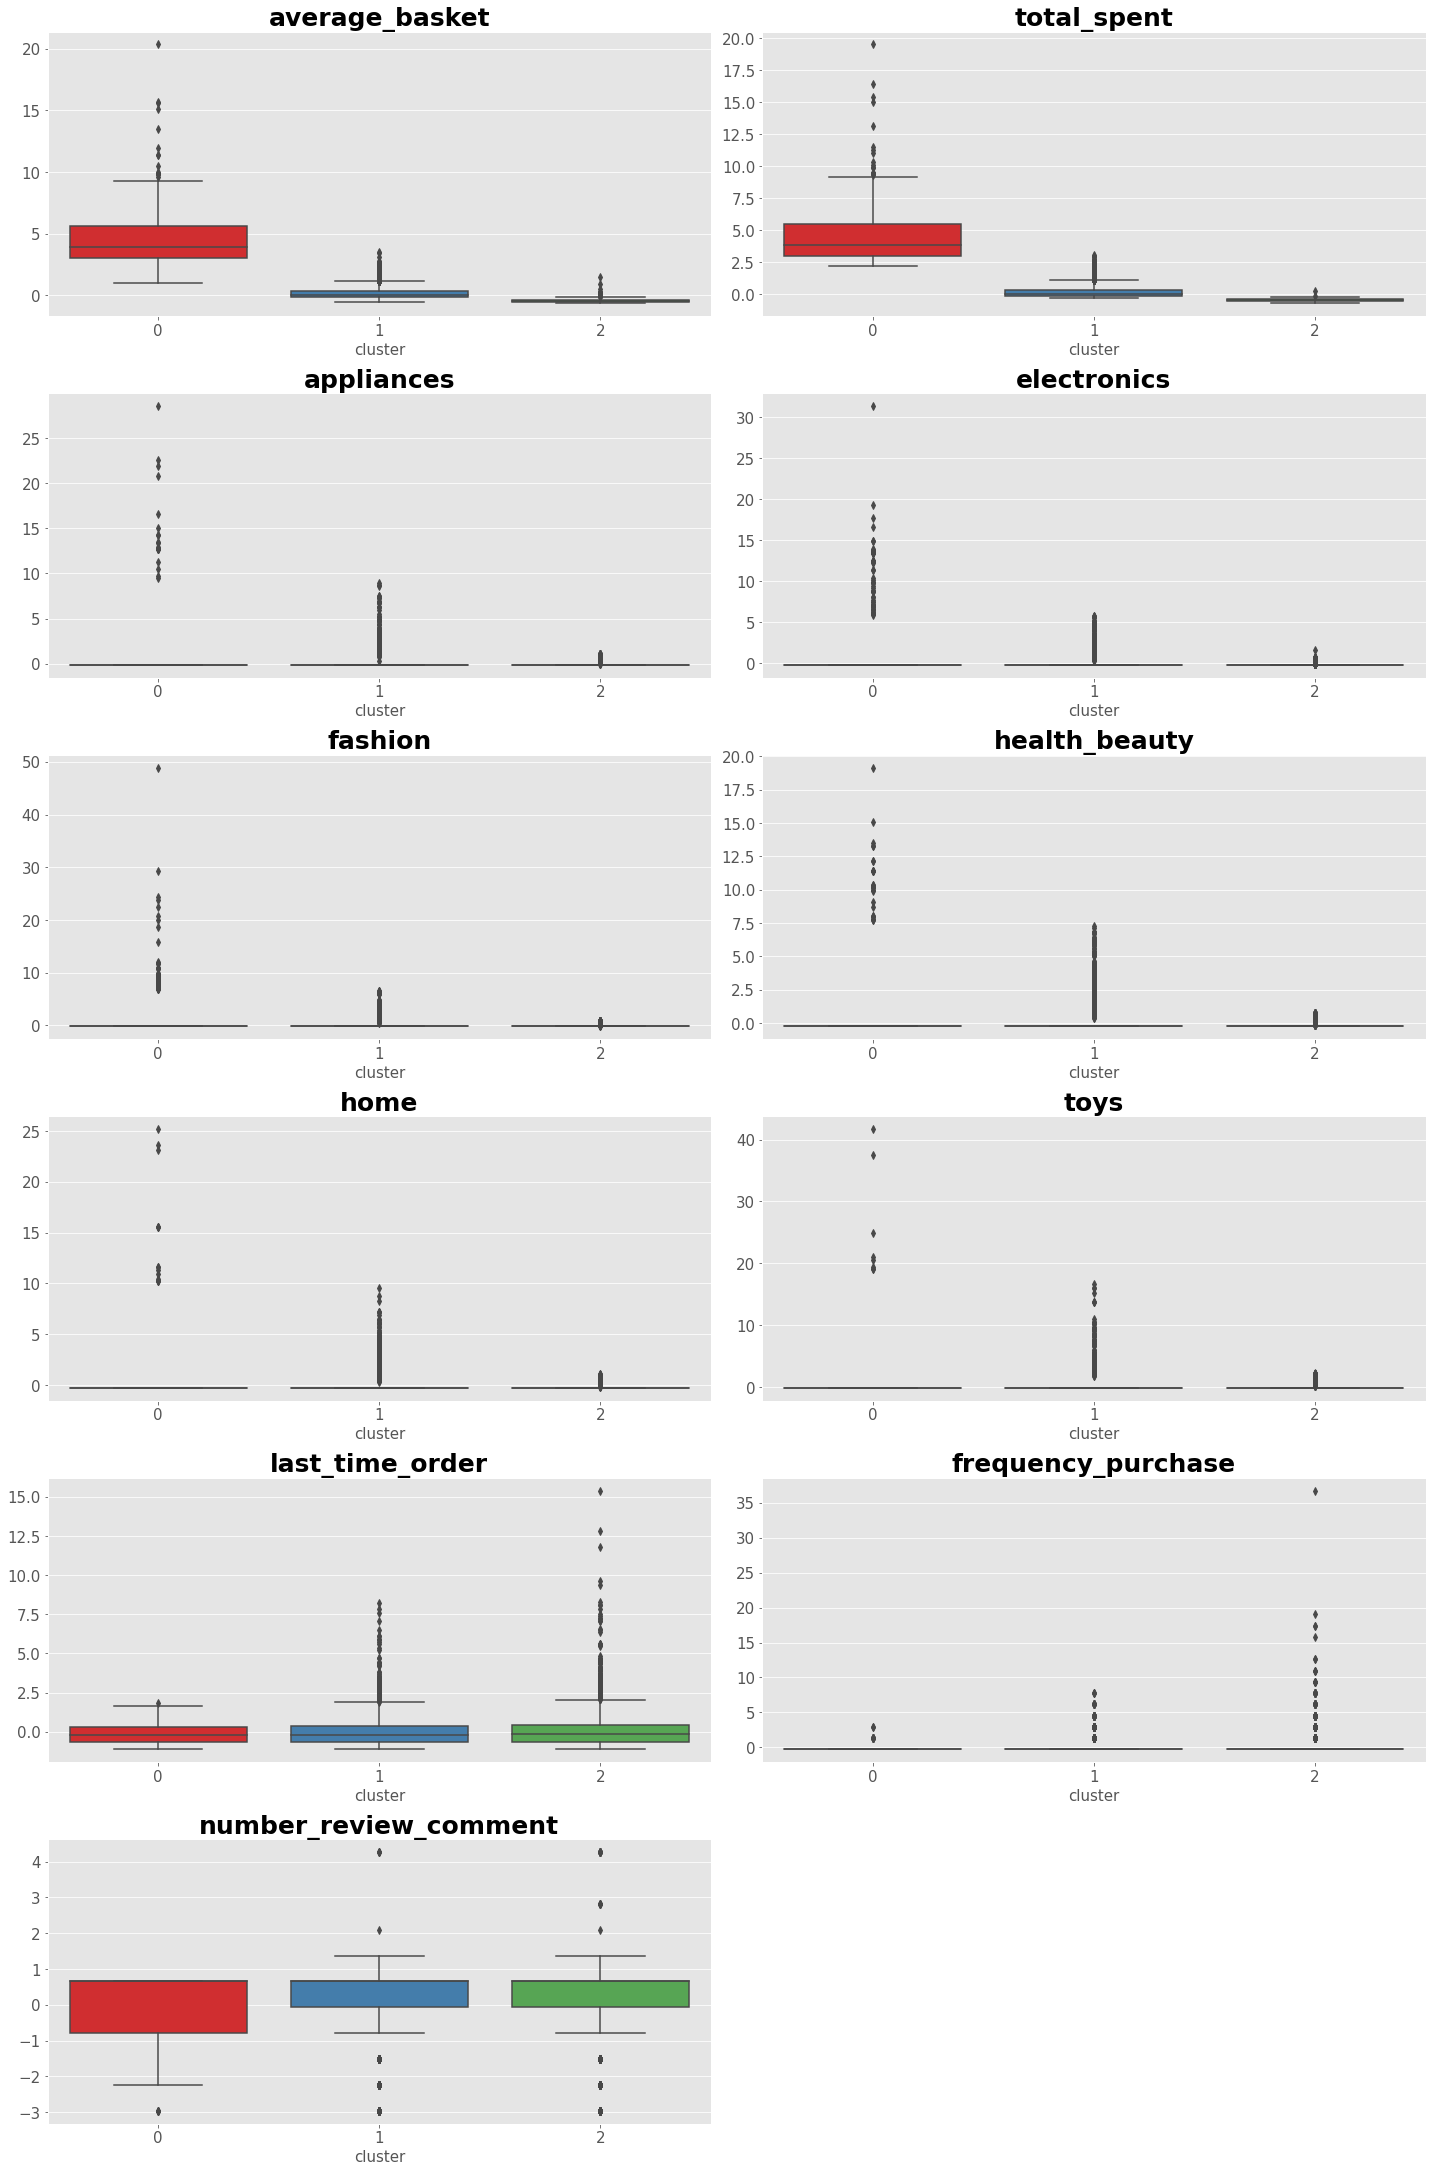

In [29]:
features_kmeans(X_sample, ['average_basket', 'total_spent', 'number_orders', 'last_time_order', 
                           'frequency_purchase', 'number_review_comment', 'home', 'health_beauty', 
                           'fashion', 'electronics', 'appliances', 'toys'], 
                get_model='KMeans3_X_sample', get_folder='model/')

Les centroïdes ci-dessous permettent de comparer les clusters entre eux selon les variables. Une analyse peut être faite à partir des centroïdes, ici elle sera faite plus loin dans l'analyse, une fois toutes les optimisations réalisées. **Visuellement la comparaison est possible à partir des éléments ci-dessous :** 

In [30]:
centroids_cls(X_sample, get_model='KMeans3_X_sample', get_folder='model/')[1]

average_basket  total_spent  max_order_amount  min_order_amount  \
0        4.697183     4.689938          4.697183          4.697183   
1        0.214681     0.228179          0.215694          0.215694   
2       -0.433048    -0.446464         -0.435696         -0.435696   

   number_of_products_purchased  bucket_quartile_lower25  \
0                           0.0                -0.576178   
1                           0.0                -0.576178   
2                           0.0                 0.554687   

   bucket_quartile_25_50  bucket_quartile_50_75  bucket_quartile_upper75  \
0              -0.579007              -0.575800                 1.729108   
1              -0.579007               0.628001                 0.527466   
2               0.597594              -0.574865                -0.577866   

   payment_boleto  payment_credit_card  payment_debit_card  payment_voucher  \
0       -0.034189             0.070455            0.120370        -0.090561   
1       -0.044242             0.059516           -0.013549        -0.041579   
2        0.091454            -0.102379           -0.003916         0.017083   

   appliances      auto  construction   culture  electronics   fashion  \
0    1.016145  0.768389      0.514441  0.126513     1.984138  2.175760   
1    0.013129  0.037622      0.022918  0.030994     0.019304  0.027036   
2   -0.074723 -0.084081     -0.070307 -0.020629    -0.112149 -0.135270   

       food    garden  health_beauty   hobbies      home    office    others  \
0 -0.070867  1.269712       0.844089  1.499091  0.505471  0.376963  1.324496   
1  0.008336  0.003087       0.125735 -0.006915  0.128777  0.093739  0.032575   
2  0.006649 -0.053523      -0.160203 -0.035360 -0.146324 -0.110312 -0.111915   

       pets  sports_leisure      toys  last_time_order  frequency_purchase  \
0 -0.080712        1.094993  0.640378        -0.099247           -0.205046   
1  0.035775        0.083815  0.054596        -0.056486           -0.087065   
2 -0.055581       -0.120053 -0.072828         0.032882            0.076629   

   number_review_comment  state_MG  state_PR  state_RJ  state_RS  state_SP  \
0              -0.164150  0.102273  0.034091  0.193182  0.064394  0.291667   
1              -0.015889  0.120643  0.054895  0.137967  0.058443  0.362764   
2               0.016878  0.116481  0.049545  0.115875  0.060667  0.464105   

   state_other  
0     0.314394  
1     0.265289  
2     0.193327

In [31]:
kmeans_model(X_sample, k=4, folder='model/')

Time: 0.214 seconds


KMeans(n_clusters=4)

c:\Python3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


KMeans Silhouette Score: 0.131
Time pca plot: 2.737 seconds


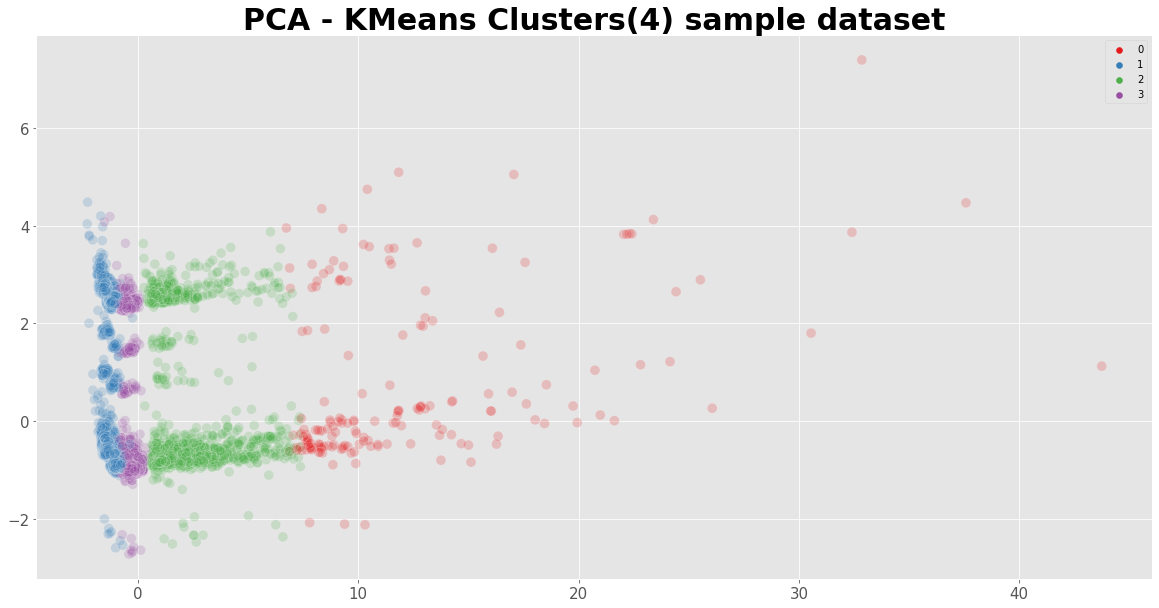

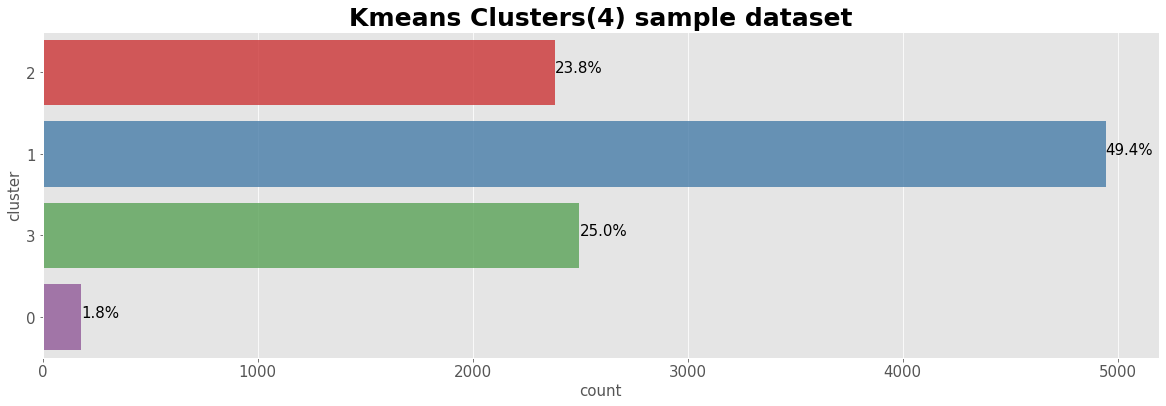

In [32]:
kmeans_clustering_pca(X_sample, k=4, get_model='KMeans4_X_sample', get_folder='model/', 
                      add_title='sample dataset')

c:\Python3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


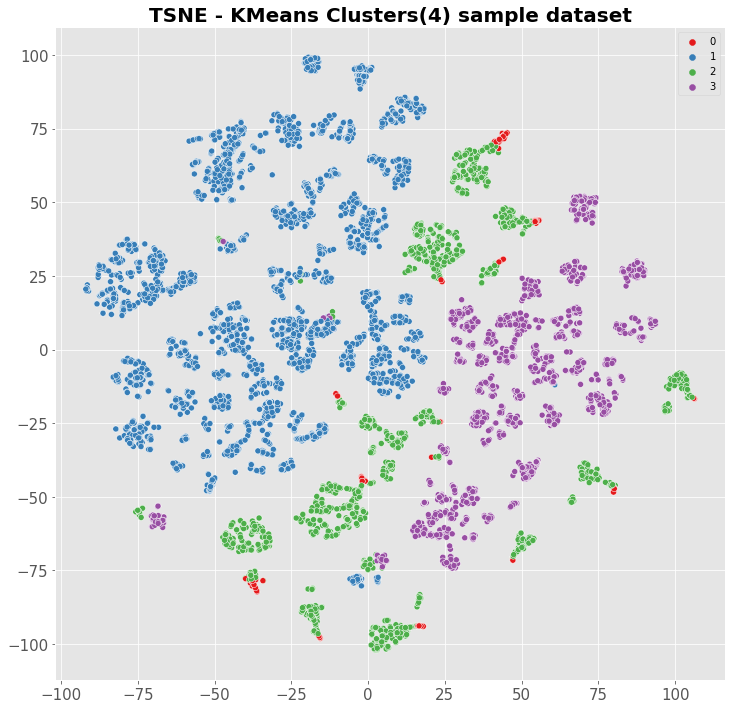

Time TSNE plot: 0.796 seconds


In [33]:
kmeans_clustering_tsne(X=X_sample, k=4, get_model='KMeans4_X_sample', get_folder='model/',
                       add_title='sample dataset')

L’algorithme t-SNE qui est une méthode intéressante pour visualiser nos données, seulement il ne sera pas reconduit sur l'ensemble de l'échantillon car trop consommateur en temps de calcul sur ma machine.

In [34]:
centroids_cls(X_sample, get_model='KMeans4_X_sample', get_folder='model/')[1]

average_basket  total_spent  max_order_amount  min_order_amount  \
0        5.629370     5.584021          5.608752          5.608752   
1       -0.432957    -0.446474         -0.435674         -0.435674   
2        0.641704     0.668466          0.645778          0.645778   
3       -0.105311    -0.102280         -0.105648         -0.105648   

   number_of_products_purchased  bucket_quartile_lower25  \
0                           0.0                -0.576178   
1                           0.0                 0.554916   
2                           0.0                -0.576178   
3                           0.0                -0.576178   

   bucket_quartile_25_50  bucket_quartile_50_75  bucket_quartile_upper75  \
0              -0.579007              -0.575800                 1.729108   
1               0.597832              -0.575800                -0.577866   
2              -0.579007              -0.575800                 1.729108   
3              -0.579007               1.736714                -0.578333   

   payment_boleto  payment_credit_card  payment_debit_card  payment_voucher  \
0       -0.076915             0.097637            0.147959        -0.068253   
1        0.090560            -0.101557           -0.003891         0.017114   
2       -0.072145             0.091335           -0.019719        -0.035411   
3       -0.012397             0.025898           -0.005058        -0.050782   

   appliances      auto  construction   culture  electronics   fashion  \
0    1.397522  1.049735      0.393892  0.208772     2.458512  2.532448   
1   -0.074713 -0.084075     -0.070304 -0.020625    -0.112134 -0.135262   
2    0.071707  0.122967      0.108195  0.027660     0.152623  0.179379   
3   -0.035466 -0.038769     -0.032976  0.031570    -0.074139 -0.069831   

       food    garden  health_beauty   hobbies      home    office    others  \
0 -0.070867  1.859326       0.992057  2.172978  0.388996  0.531574  0.961785   
1  0.006664 -0.053888      -0.160028 -0.035359 -0.146295 -0.110307 -0.111911   
2  0.039950  0.025088       0.323716  0.028211  0.259960  0.161761  0.171559   
3 -0.024594 -0.015616      -0.049465 -0.036620  0.024706  0.027463 -0.029747   

       pets  sports_leisure      toys  last_time_order  frequency_purchase  \
0 -0.080712        1.400445  0.453547        -0.162693           -0.227120   
1 -0.055576       -0.120041 -0.072815         0.029312            0.070839   
2  0.021199        0.153479  0.148691        -0.087716           -0.111946   
3  0.045625        0.030284 -0.001770        -0.016523           -0.054277   

   number_review_comment  state_MG  state_PR  state_RJ  state_RS  state_SP  \
0              -0.192874  0.129213  0.039326  0.196629  0.067416  0.269663   
1               0.016311  0.116505  0.049555  0.115898  0.060680  0.464401   
2              -0.027710  0.120487  0.053317  0.136020  0.055835  0.344668   
3              -0.006531  0.118189  0.055288  0.141426  0.060897  0.378606   

   state_other  
0     0.297753  
1     0.192961  
2     0.289673  
3     0.245593

La première remarque à faire pour ces deux clustering est la stabilité du coefficient de silhouette.

In [35]:
kmeans_model(X_sample, k=5, folder='model/')

Time: 0.228 seconds


KMeans(n_clusters=5)

c:\Python3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


KMeans Silhouette Score: 0.145
Time pca plot: 2.851 seconds


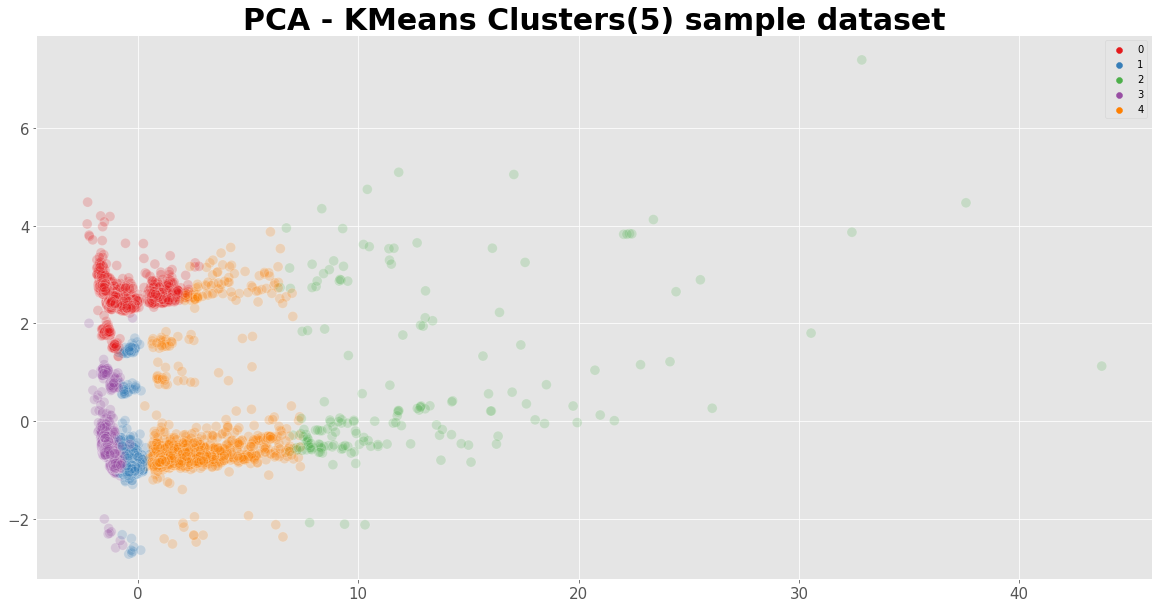

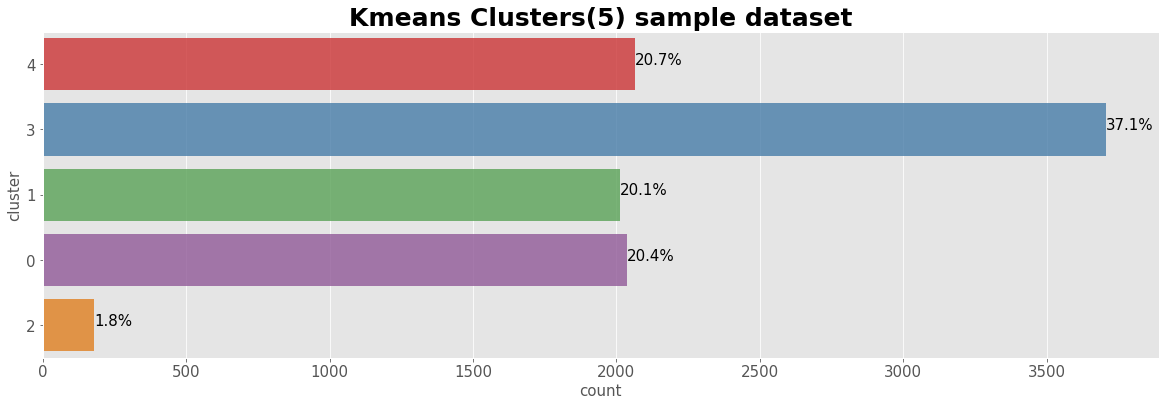

In [36]:
kmeans_clustering_pca(X_sample, k=5, get_model='KMeans5_X_sample', get_folder='model/', 
                      add_title='sample dataset')

c:\Python3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


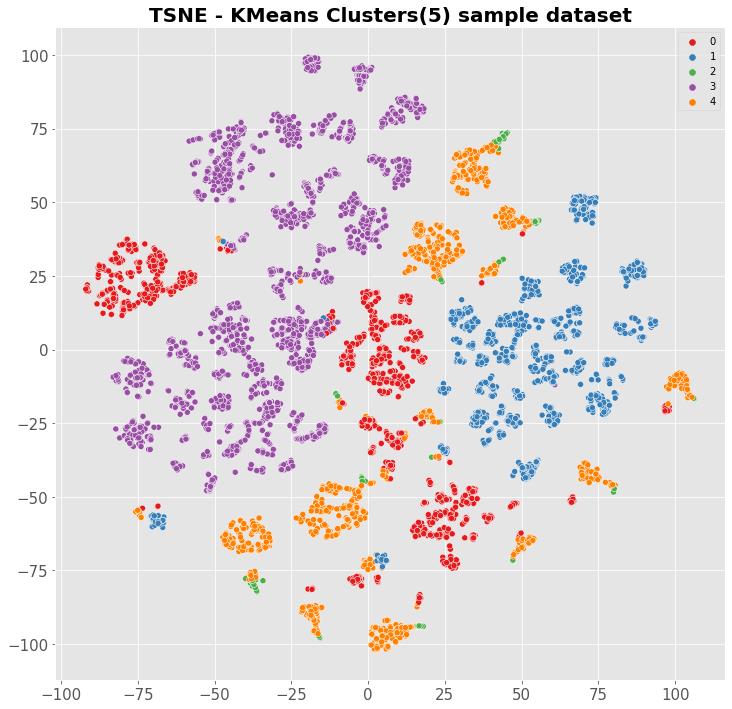

Time TSNE plot: 0.923 seconds


In [37]:
kmeans_clustering_tsne(X=X_sample, k=5, get_model='KMeans5_X_sample', get_folder='model/',
                       add_title='sample dataset')

### Modélisation avec un algorithme de Clustering Hiérarchique
L'algorithme cherche à créer des clusters homogènes bien séparés par récurrence, et permet de partitionner un jeu de données de manière hiérarchique. À chaque étape, on agrège les deux clusters les plus proches.

### Quelques fonctions utiles à l'analyse…

In [38]:
def model_save(X, n_cls, folder):
    '''Save my model in a folder for future use.'''
    start_time = time.time()
    model = AgglomerativeClustering(n_clusters=n_cls).fit(X)
    filename = str(model).split('(')[0]
    pickle.dump(model, open(folder + filename + str(n_cls) + '_' + str(X.name) + '.pkl', 'wb'))
    print("Time: {} seconds".format(round(time.time() - start_time, 3)))
    return model

In [39]:
def plot_dendrogram(X, **kwargs):
    '''Plot Hierarchical Clustering Dendrogram.'''
    model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
    model = model.fit(X)
    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    show()


In [40]:
def clusters_cah(X, model):
    '''Percentage distribution clusters.'''
    start_time = time.time()
    
    Z = linkage(X, method = 'ward', metric='euclidean')

    fclusters = fcluster(Z, 4, criterion='maxclust')
    idg = np.argsort(fclusters)

    clusters = pd.DataFrame(X.index[idg], fclusters[idg]).reset_index()
    clusters = clusters.rename(columns={'index':'cluster'})

    ax, fig = plt.subplots(figsize=(20,6)) 
    #clusters = pd.DataFrame(model.labels_, columns=['cluster'])
    ax = sns.countplot(data=clusters, y='cluster', palette = 'Set1', alpha=.8, 
                        order=clusters['cluster'].value_counts(sort=False).index, orient='h')

    for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/len(clusters))
            x = p.get_x() + p.get_width()
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y), fontsize=15)
            ax.set_title('Hierarchical Clusters')

    print("Time: {} seconds".format(round(time.time() - start_time, 3)))
    show()


In [41]:
def crosstab_cah_kmeans(X, n_clusters, model_cah, model_kmeans):
    '''Crossing of kmeans and cah tables to see similarities.'''    

    Z = linkage(X, method = 'ward', metric='euclidean')

    fclusters = fcluster(Z, n_clusters, criterion='maxclust')
    idg = np.argsort(fclusters)

    clusters = pd.DataFrame(X.index[idg], fclusters[idg]).reset_index()
    clusters = clusters.rename(columns={'index':'cluster'}).set_index('customer_unique_id')
    
    centroids_cah = pd.merge(X, clusters, left_index=True, right_index=True)
    result = pd.crosstab(clusters.cluster, model_kmeans.labels_, rownames=['cah'], colnames=['kmeans'])
    
    return centroids_cah, result

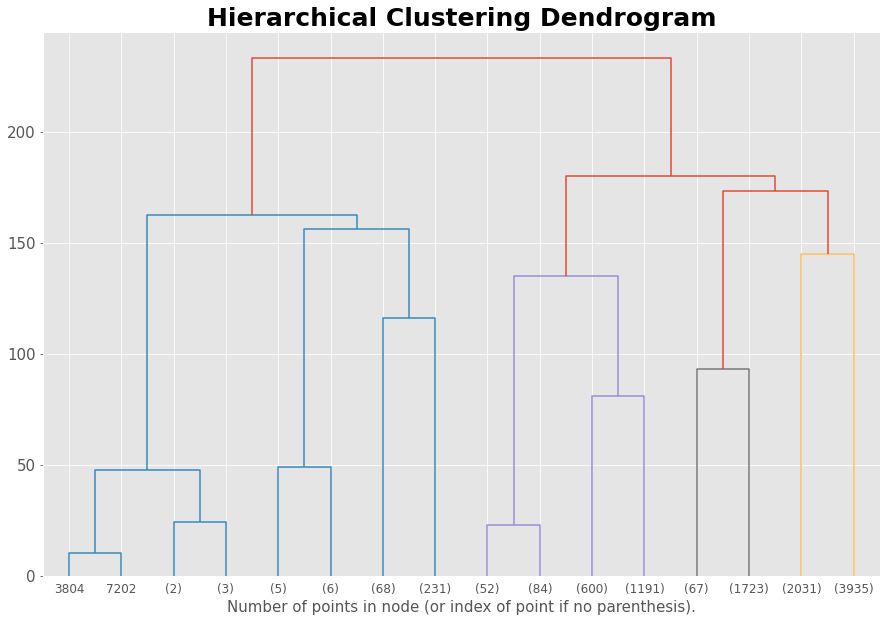

In [42]:
plot_dendrogram(X_sample, truncate_mode='level', p=3)

**Le dendrogramme suggère un partitionnement en 4 groupes**. Voyons ce que donne la projection via le PCA et le T-SNE.

In [43]:
cls4_cah = model_save(X_sample, n_cls=4, folder='model/')
cls4_cah

Time: 7.321 seconds


AgglomerativeClustering(n_clusters=4)

c:\Python3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


CAH Silhouette Score: 0.1656735894364018


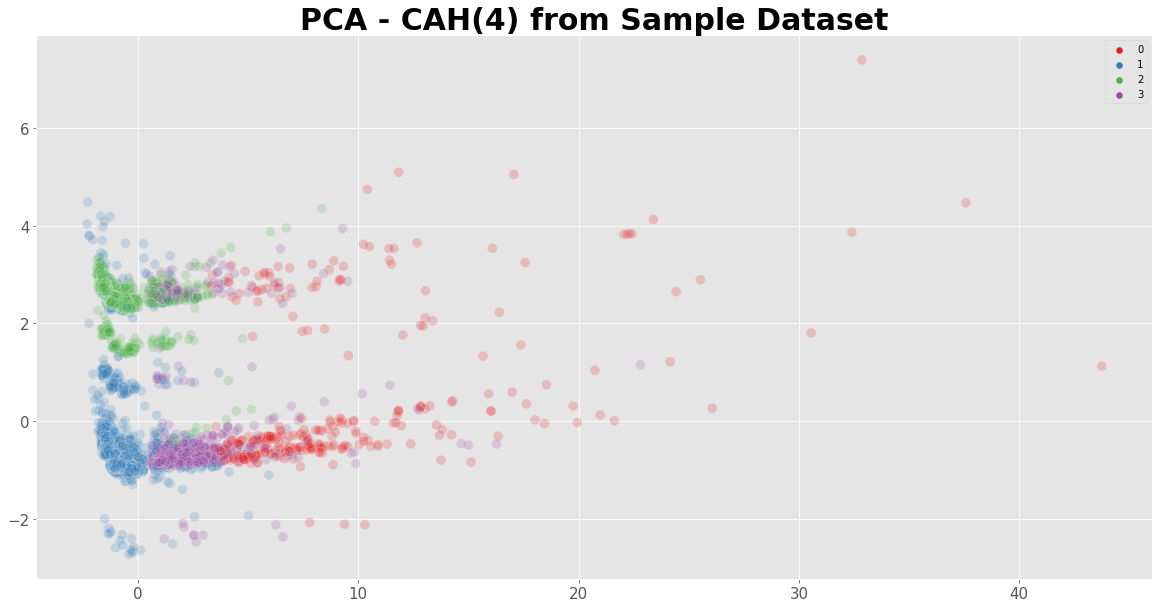

In [44]:
pca = PCA(svd_solver='full').fit(X_sample)
X_projected = pca.transform(X_sample)

plt.figure(figsize=(20, 10))
sns.scatterplot(X_projected[:,0], X_projected[:,1], 
                hue = cls4_cah.labels_, 
                palette = 'Set1',
                s=100, alpha=0.2).set_title('PCA - CAH(4) from Sample Dataset', fontsize=30)

print('CAH Silhouette Score: {}'.format(
    metrics.silhouette_score(X_projected, cls4_cah.labels_, metric='euclidean')))

show()

c:\Python3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


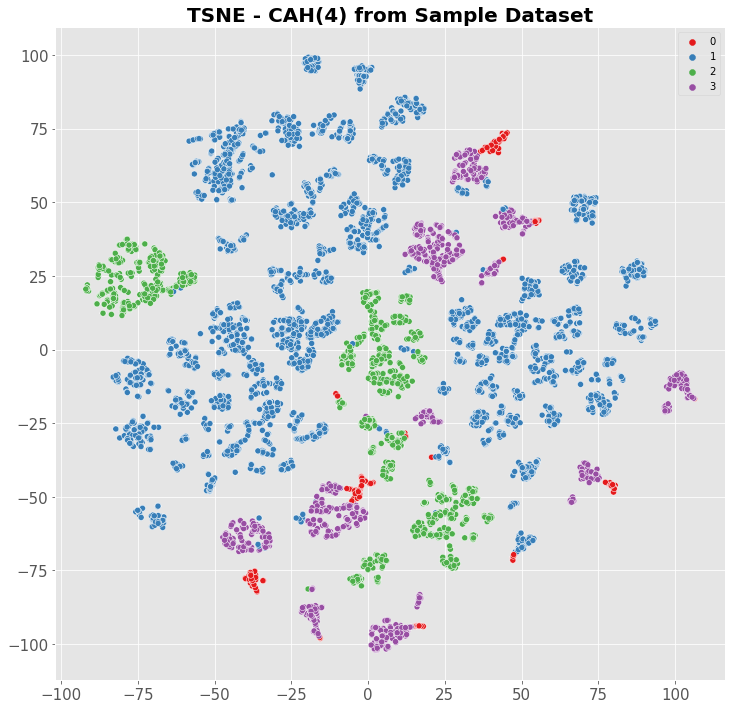

In [45]:
plt.figure(figsize=(12, 12))
sns.scatterplot(T[:,0], T[:,1], hue=cls4_cah.labels_, palette='Set1')
plt.title('TSNE - CAH(4) from Sample Dataset', fontsize=20)
show()

Time: 7.538 seconds


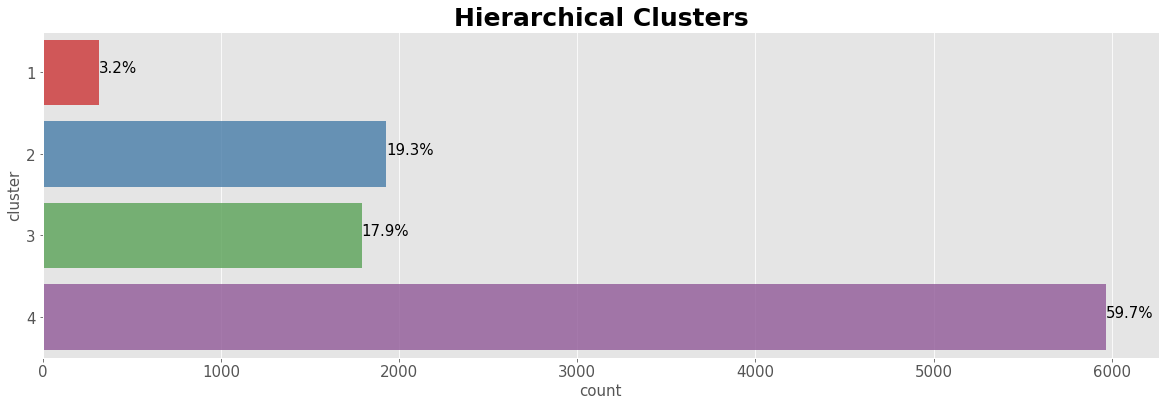

In [46]:
clusters_cah(X_sample, cls4_cah)

L'approche par clustering hierarchique est intéressante, relativement assez proche du KMeans. Ceci étant, le test a été effectué sur un échantillon 9 fois plus petit que celui d'origine, de manière à optimiser (et faciliter les tests) les temps de calcul. **Le clustering hierarchique ne sera pas la modélisation optimale sur l'ensemble des individus, d'autant plus que la population augmentera sans doute dans le temps.**

In [47]:
cls4_kmeans = pickle.load(open('model/KMeans4_X_sample.pkl', 'rb'))
crosstab_cah_kmeans(X_sample, 4, cls4_cah, cls4_kmeans)[0].groupby('cluster').mean()

average_basket  total_spent  max_order_amount  min_order_amount  \
cluster                                                                    
1              4.006239     3.971721          3.994208          3.994208   
2             -0.238589    -0.244303         -0.240917         -0.240917   
3              0.587655     0.617856          0.591167          0.591167   
4             -0.290806    -0.296789         -0.291850         -0.291850   

         number_of_products_purchased  bucket_quartile_lower25  \
cluster                                                          
1                                 0.0                -0.576178   
2                                 0.0                 0.203603   
3                                 0.0                -0.576178   
4                                 0.0                 0.109288   

         bucket_quartile_25_50  bucket_quartile_50_75  \
cluster                                                 
1                    -0.579007              -0.575800   
2                     0.080392              -0.006972   
3                    -0.579007              -0.575800   
4                     0.183251               0.207958   

         bucket_quartile_upper75  payment_boleto  payment_credit_card  \
cluster                                                                 
1                       1.729108       -0.088185             0.103338   
2                      -0.276582        1.809746            -1.798054   
3                       1.729108       -0.283466             0.327005   
4                      -0.500206       -0.456046             0.443217   

         payment_debit_card  payment_voucher  appliances      auto  \
cluster                                                              
1                  0.079317        -0.090591    0.730780  0.389078   
2                  0.446698        -0.136734   -0.073818 -0.068094   
3                 -0.120646        -0.094513    0.118596  0.220198   
4                 -0.121098         0.054097   -0.056996 -0.070224   

         construction   culture  electronics   fashion      food    garden  \
cluster                                                                      
1           -0.085884  0.352767     1.998006  1.984764 -0.070867  0.833735   
2           -0.049257 -0.020941    -0.035707 -0.093367 -0.069948 -0.049512   
3            0.214525 -0.043744     0.031652  0.141229 -0.070867  0.092743   
4           -0.060998  0.014534    -0.093781 -0.111805  0.056690 -0.041833   

         health_beauty   hobbies      home    office    others      pets  \
cluster                                                                    
1             1.409309  1.101569 -0.286239  0.095251  1.291268 -0.080712   
2            -0.046574  0.066337 -0.036339 -0.080236 -0.090598 -0.072190   
3             0.224274 -0.044355  0.384827  0.282124  0.127258 -0.080712   
4            -0.121592 -0.035176 -0.084015 -0.063268 -0.085523  0.030910   

         sports_leisure      toys  last_time_order  frequency_purchase  \
cluster                                                                  
1              0.882085  0.845954        -0.142492           -0.224408   
2             -0.074553 -0.097847        -0.012669           -0.044719   
3              0.223812 -0.133936        -0.148270           -0.177983   
4             -0.073686  0.038657         0.033651            0.064293   

         number_review_comment  state_MG  state_PR  state_RJ  state_RS  \
cluster                                                                  
1                    -0.096164  0.113565  0.044164  0.173502  0.047319   
2                     0.008782  0.112610  0.060716  0.093928  0.074209   
3                    -0.033143  0.119553  0.050279  0.141899  0.056983   
4                     0.006184  0.119678  0.049614  0.133255  0.056487   

         state_SP  state_other  
cluster                         
1        0.315457     0.305994  
2        0.440581     0.217955  
3   

In [48]:
crosstab_cah_kmeans(X_sample, 4, cls4_cah, cls4_kmeans)[1]

kmeans    0     1     2     3
cah                          
1         5   155    75    82
2        36   970   468   453
3        30   877   422   461
4       107  2942  1417  1500

Le parallèle entre les deux méthodes (KMeans et CAH) permet d'appuyer l'hypothèse d'une meilleure interprétabilité du contexte métier. Le clustering en 4 partitions permet de mieux différencier notre population selon des caractéritiques similaires entre eux pour l'aide à la décision des opérations Marketing.

Voyons comment améliorer la modélisation retenue KMeans, l'évaluer dans le temps, sa stabilité, etc…

### Modélisation par l'estimation de la densité locale DBSCAN et OPTICS
L'algorithme DBSCAN est difficile à utiliser sur des jeux de données à grande dimension. Ceci étant, après avoir déterminé l'epsilon optimal, un test de modélisation est nécessaire pour visualiser ce type de clustering.

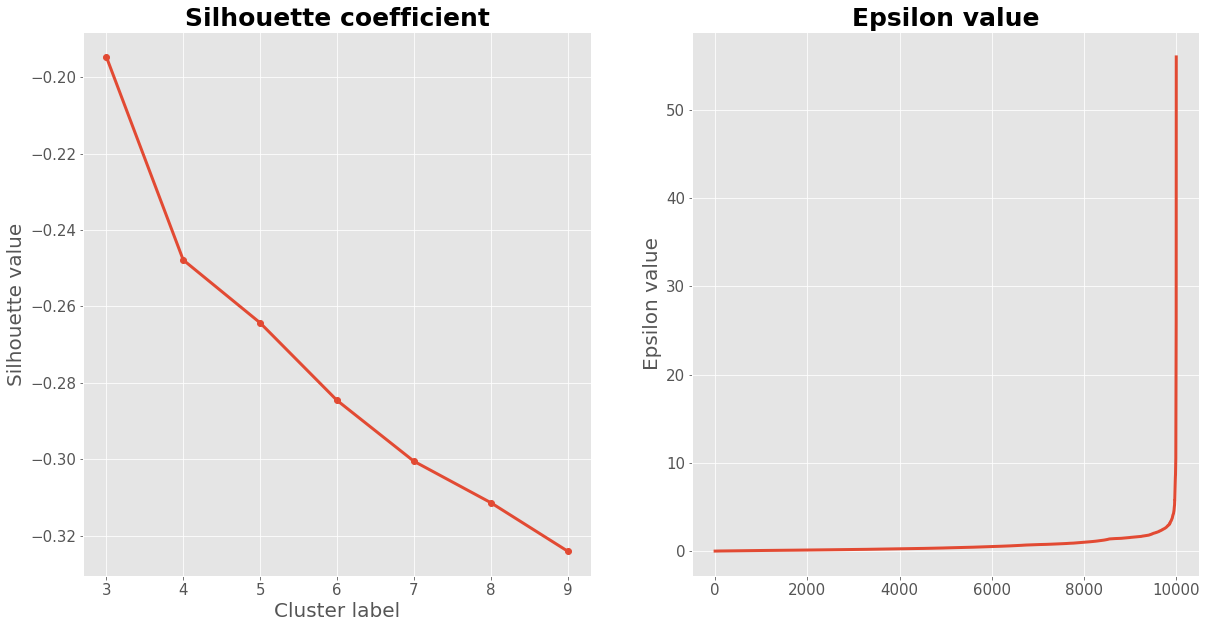

In [49]:
from sklearn.neighbors import NearestNeighbors
plt.figure(figsize=(20,10))
silhouettes = [] 

plt.subplot(121)
for k in range(3,10): 
    dbs = DBSCAN(min_samples=k)  
    dbs.fit(X_sample)
    silh = metrics.silhouette_score(X_sample, dbs.labels_)
    silhouettes.append(silh)
plt.plot(range(3,10), silhouettes, marker='o', linewidth=3)
plt.xlabel('Cluster label', fontsize=20)
plt.ylabel('Silhouette value', fontsize=20)
plt.title("Silhouette coefficient", fontsize=25)

plt.subplot(122)
nearest_neighbors = NearestNeighbors(n_neighbors=5)
nearest_neighbors.fit(X_sample)
distances, indices = nearest_neighbors.kneighbors(X_sample)
distances = np.sort(distances, axis=0)[:, 1]
plt.plot(distances, linewidth=3)
plt.xlabel('', fontsize=20)
plt.ylabel('Epsilon value', fontsize=20)
plt.title("Epsilon value", fontsize=25)

plt.show()

In [50]:
cls_dbs = DBSCAN(eps = 3, min_samples=5)  
cls_dbs.fit(X_sample)

DBSCAN(eps=3)

c:\Python3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


DBSCAN Silhouette Score: -0.07463510637395934


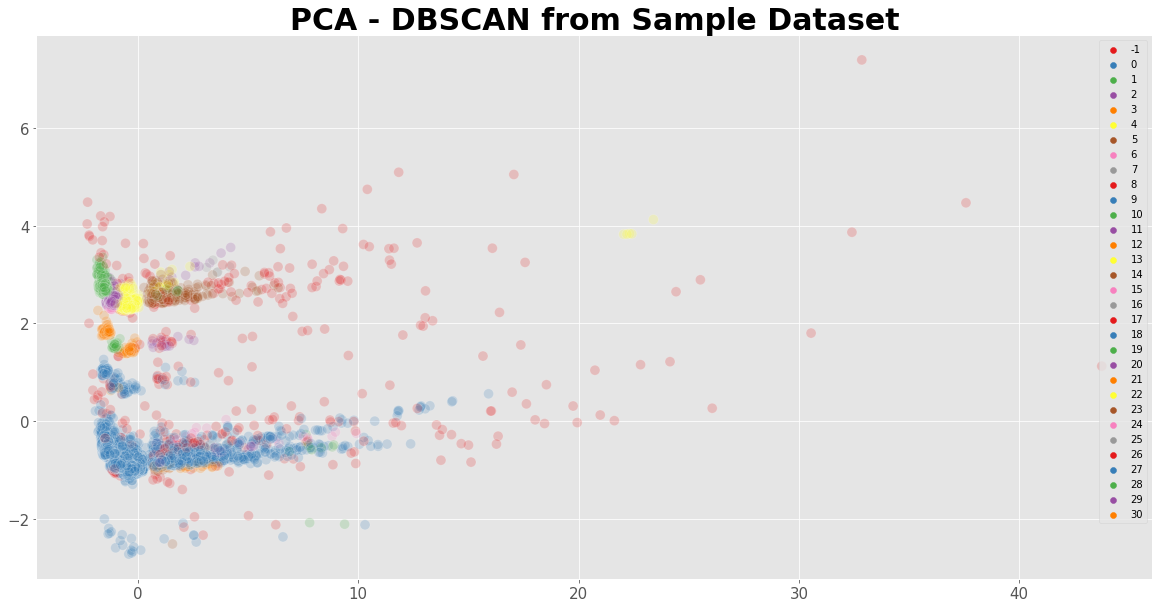

In [51]:
pca = PCA(n_components=20).fit(X_sample)
X_projected = pca.transform(X_sample)

plt.figure(figsize=(20, 10))
sns.scatterplot(X_projected[:,0], X_projected[:,1], 
                hue = cls_dbs.labels_, 
                palette = 'Set1',
                s=100, alpha=0.2).set_title('PCA - DBSCAN from Sample Dataset', fontsize=30)

print('DBSCAN Silhouette Score: {}'.format(
    metrics.silhouette_score(X_projected, cls_dbs.labels_, metric='euclidean')))

show()

c:\Python3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


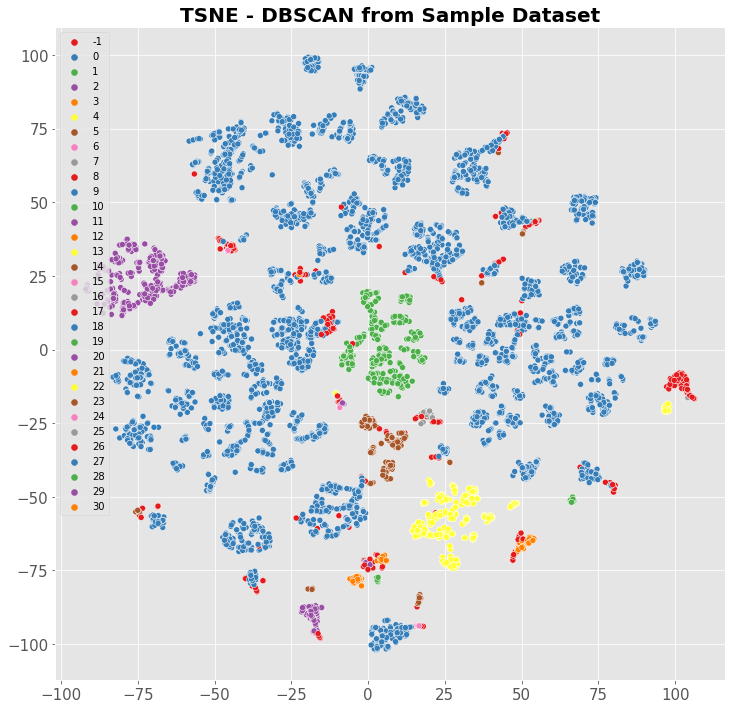

In [52]:
plt.figure(figsize=(12,12))
sns.scatterplot(T[:,0], T[:,1], hue = cls_dbs.labels_, palette='Set1')
plt.title('TSNE - DBSCAN from Sample Dataset', fontsize=20)
show()

Malgré l'avantage du DBSCAN d'être efficace en temps de calcul sans requérir de prédéfinir le nombre de clusters, **le clustering par densité n'est pas efficace sur notre échantillon.**

# Modélisation KMeans sur l'ensemble de l'échantillon
Les premières étapes KMeans ont été exercées sur un échantillon aléatoire de 10000 individus, rappelons que l'échantillon de travail comporte une population 9 fois plus grande. Voyons si les résultats restents stables.

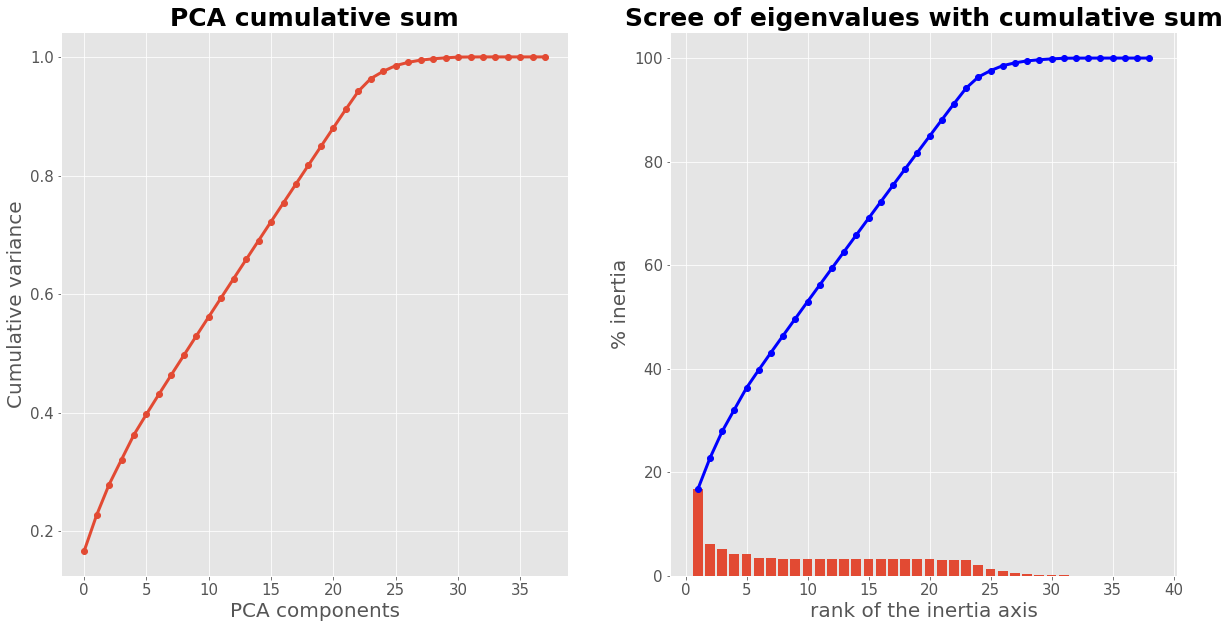

In [53]:
pca_eigenvalues(X)

In [54]:
pca = PCA(n_components=20).fit(X)
pca.explained_variance_ratio_.cumsum()

array([0.16674346, 0.22731716, 0.27882224, 0.32112152, 0.36307384,
       0.39760925, 0.43122694, 0.46415293, 0.49686801, 0.52952621,
       0.56185038, 0.59413062, 0.62632197, 0.65842072, 0.69041463,
       0.72233888, 0.75417323, 0.78588935, 0.8175662 , 0.84910483])

Stabilité des PCA Components entre l'échantillonnage et le jeu de données complet.

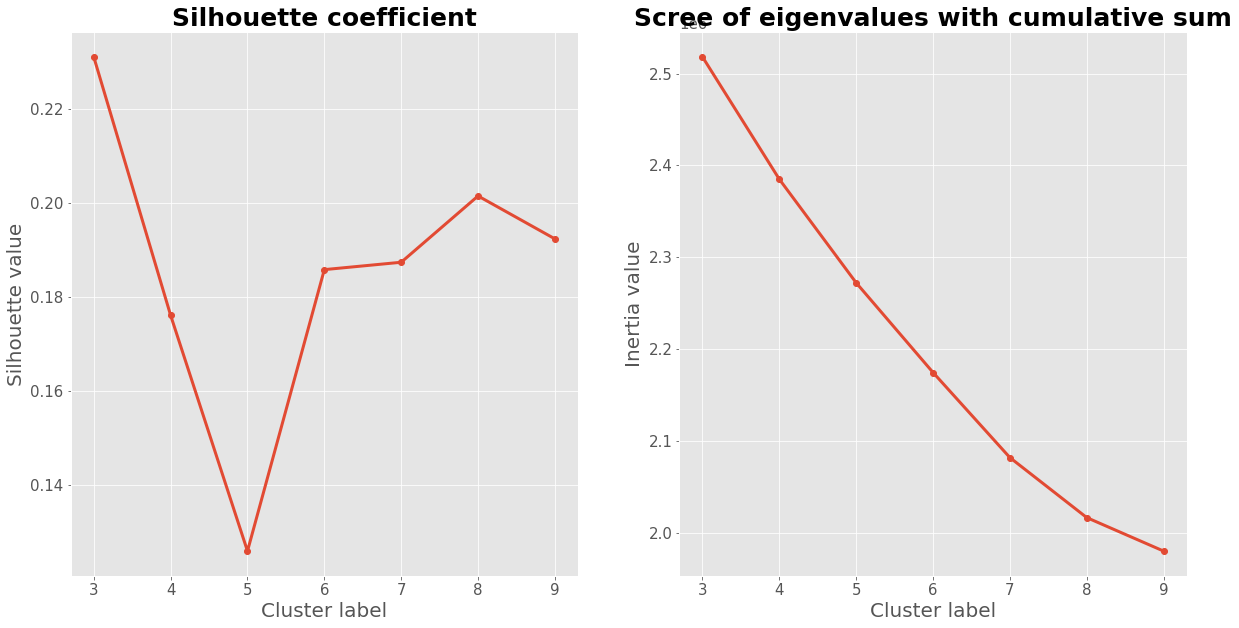

Time: 1347.525 seconds


In [55]:
silhouette_inertia(X)

Notons que les coefficients de silhouette évoluent de la même manière entre l'échantillonnage et le jeu de données complet.

In [56]:
kmeans_model(X, k=4, folder='model/')

Time: 1.825 seconds


KMeans(n_clusters=4)

c:\Python3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


KMeans Silhouette Score: 0.176
Time pca plot: 192.482 seconds


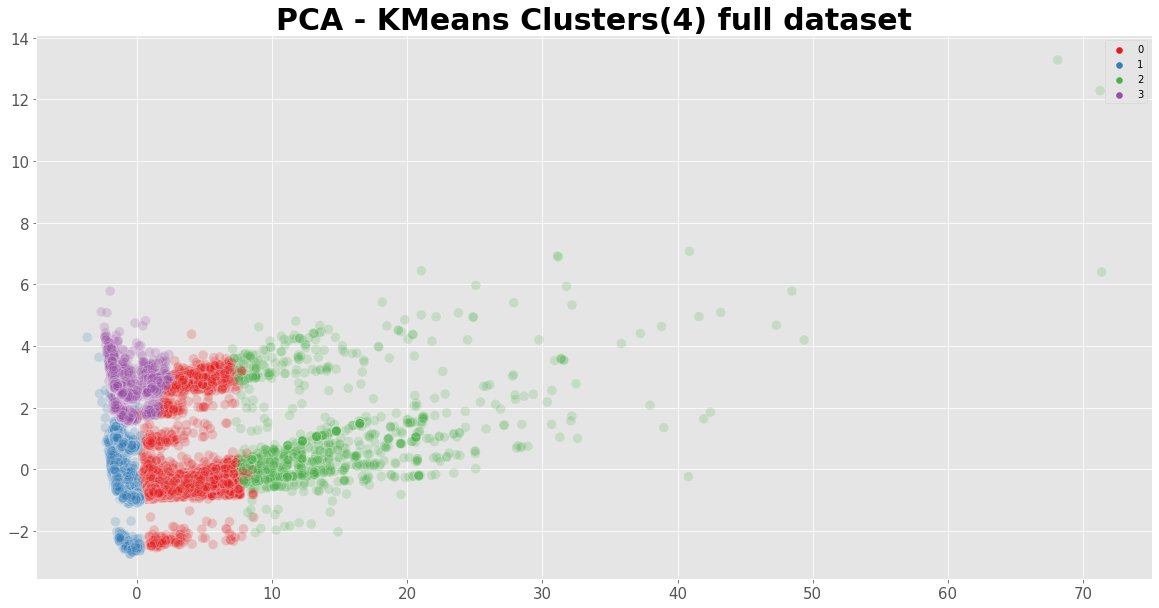

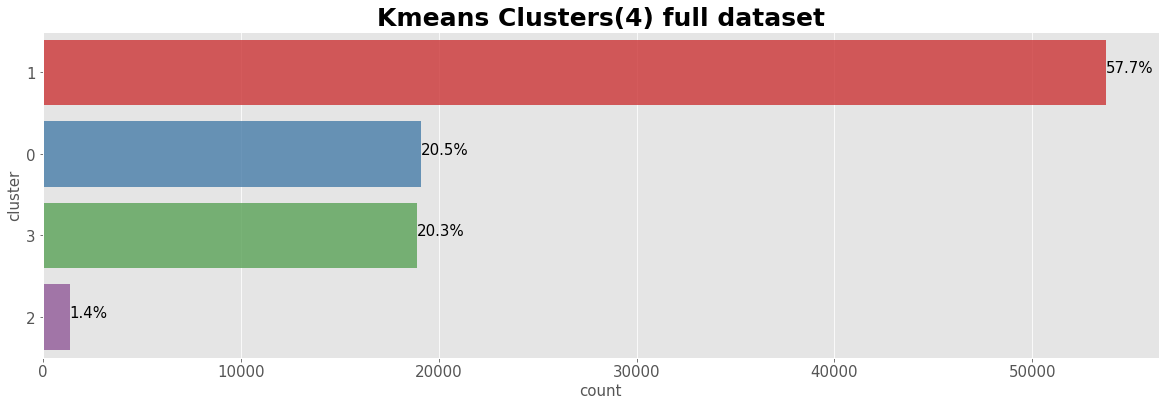

In [57]:
kmeans_clustering_pca(X, k=4, get_model='KMeans4_X', get_folder='model/', add_title='full dataset')

In [58]:
data_cls(olistbr, get_model='KMeans4_X', get_folder='model/')

average_basket  total_spent  \
customer_unique_id                                              
0000366f3b9a7992bf8c76cfdf3221e2          129.90       141.90   
0000b849f77a49e4a4ce2b2a4ca5be3f           18.90        27.19   
0000f46a3911fa3c0805444483337064           69.00        86.22   
0000f6ccb0745a6a4b88665a16c9f078           25.99        43.62   
0004aac84e0df4da2b147fca70cf8255          180.00       196.89   
...                                          ...          ...   
fe6db9c6a1a30ca55742eaf095e3032a          102.90       120.87   
fe702f5f24b432afd18e24f53feb9bbe          370.47       403.81   
fe713394dfe3e40c4e5a6fc3ed017080           39.90        61.05   
fe71393e06baa2636d75e3bd65c10e0a          199.90       216.05   
fe723a20cfca7bef0e6b4e7f2fe1c802           99.90       113.15   

                                  max_order_amount  min_order_amount  \
customer_unique_id                                                     
0000366f3b9a7992bf8c76cfdf3221e2            129.90            129.90   
0000b849f77a49e4a4ce2b2a4ca5be3f             18.90             18.90   
0000f46a3911fa3c0805444483337064             69.00             69.00   
0000f6ccb0745a6a4b88665a16c9f078             25.99             25.99   
0004aac84e0df4da2b147fca70cf8255            180.00            180.00   
...                                            ...               ...   
fe6db9c6a1a30ca55742eaf095e3032a            102.90            102.90   
fe702f5f24b432afd18e24f53feb9bbe            370.47            370.47   
fe713394dfe3e40c4e5a6fc3ed017080             39.90             39.90   
fe71393e06baa2636d75e3bd65c10e0a            199.90            199.90   
fe723a20cfca7bef0e6b4e7f2fe1c802             99.90             99.90   

                                  number_of_products_purchased  \
customer_unique_id                                               
0000366f3b9a7992bf8c76cfdf3221e2                           1.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                           1.0   
0000f46a3911fa3c0805444483337064                           1.0   
0000f6ccb0745a6a4b88665a16c9f078                           1.0   
0004aac84e0df4da2b147fca70cf8255                           1.0   
...                                                        ...   
fe6db9c6a1a30ca55742eaf095e3032a                           1.0   
fe702f5f24b432afd18e24f53feb9bbe                           1.0   
fe713394dfe3e40c4e5a6fc3ed017080                           1.0   
fe71393e06baa2636d75e3bd65c10e0a                           1.0   
fe723a20cfca7bef0e6b4e7f2fe1c802                           1.0   

                                  bucket_quartile_lower25  \
customer_unique_id                                          
0000366f3b9a7992bf8c76cfdf3221e2                      0.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                      1.0   
0000f46a3911fa3c0805444483337064                      0.0   
0000f6ccb0745a6a4b88665a16c9f078                      1.0   
0004aac84e0df4da2b147fca70cf8255                      0.0   
...                                                   ...   
fe6db9c6a1a30ca55742eaf095e3032a                      0.0   
fe702f5f24b432afd18e24f53feb9bbe                      0.0   
fe713394dfe3e40c4e5a6fc3ed017080                      0.0   
fe71393e06baa2636d75e3bd65c10e0a                      0.0   
fe723a20cfca7bef0e6b4e7f2fe1c802                      0.0   

                                  bucket_quartile_25_50  \
customer_unique_id                                        
0000366f3b9a7992bf8c76cfdf3221e2                    0.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                    0.0   
0000f46a3911fa3c0805444483337064                    1.0   
0000f6ccb0745a6a4b88665a16c9f078                    0.0   
0004aac84e0df4da2b147fca70cf8255                    0.0   
...                                                 ...   
fe6db9c6a1a30ca55742eaf095e3032a                    0.0   
fe702f5f24b432afd18e24f53feb9bbe                    0.0   
fe713394

In [59]:
centroids_cls(X, get_model='KMeans4_X', get_folder='model/')[1].T

0         1         2         3
average_basket                0.718697 -0.319058  6.032389 -0.244985
total_spent                   0.747821 -0.328463  6.006376 -0.245169
max_order_amount              0.725629 -0.321766  6.045335 -0.245219
min_order_amount              0.725629 -0.321766  6.045335 -0.245219
number_of_products_purchased  0.000000  0.000000  0.000000  0.000000
bucket_quartile_lower25      -0.576178  0.165494 -0.576178  0.159401
bucket_quartile_25_50        -0.579007  0.196578 -0.579007  0.058198
bucket_quartile_50_75        -0.575800  0.216797 -0.575800  0.002084
bucket_quartile_upper75       1.729108 -0.578247  1.729108 -0.219414
payment_boleto               -0.388451 -0.498848 -0.164805  1.829265
payment_credit_card           0.410593  0.484465  0.207461 -1.815113
payment_debit_card           -0.083160 -0.125022  0.000966  0.442820
payment_voucher              -0.015567  0.054966  0.002420 -0.136734
appliances                    0.096680 -0.060353  1.841287 -0.055686
auto                          0.145547 -0.065345  1.216564 -0.046223
construction                  0.138311 -0.055215  0.849145 -0.041976
culture                       0.015704 -0.009308  0.215873 -0.004470
electronics                   0.132172 -0.101155  2.768717 -0.042422
fashion                       0.259464 -0.112884  2.168807 -0.097988
food                          0.009281 -0.001904 -0.070867  0.000475
garden                        0.057582 -0.044499  1.335479 -0.030037
health_beauty                 0.314030 -0.117862  1.919988 -0.117819
hobbies                       0.027745 -0.037329  1.515936 -0.028841
home                          0.252138 -0.084564  0.840702 -0.071602
office                        0.170721 -0.066345  0.598635 -0.024456
others                        0.239527 -0.078244  0.496141 -0.054210
pets                          0.063566 -0.022590  0.394565 -0.026272
sports_leisure                0.164052 -0.072019  1.277892 -0.048686
toys                          0.191471 -0.049133  0.096880 -0.059119
last_time_order              -0.076366  0.018651 -0.136100  0.041664
frequency_purchase           -0.110445  0.033209 -0.200912  0.039047
number_review_comment        -0.018373  0.002791 -0.079660  0.007107
state_MG                      0.117419  0.117643  0.120830  0.115735
state_PR                      0.049282  0.050088  0.048925  0.055379
state_RJ                      0.138211  0.131943  0.143810  0.109435
state_RS                      0.053472  0.051578  0.051149  0.068139
state_SP                      0.352886  0.440667  0.307635  0.422702
state_other                   0.288729  0.208081  0.327650  0.228611

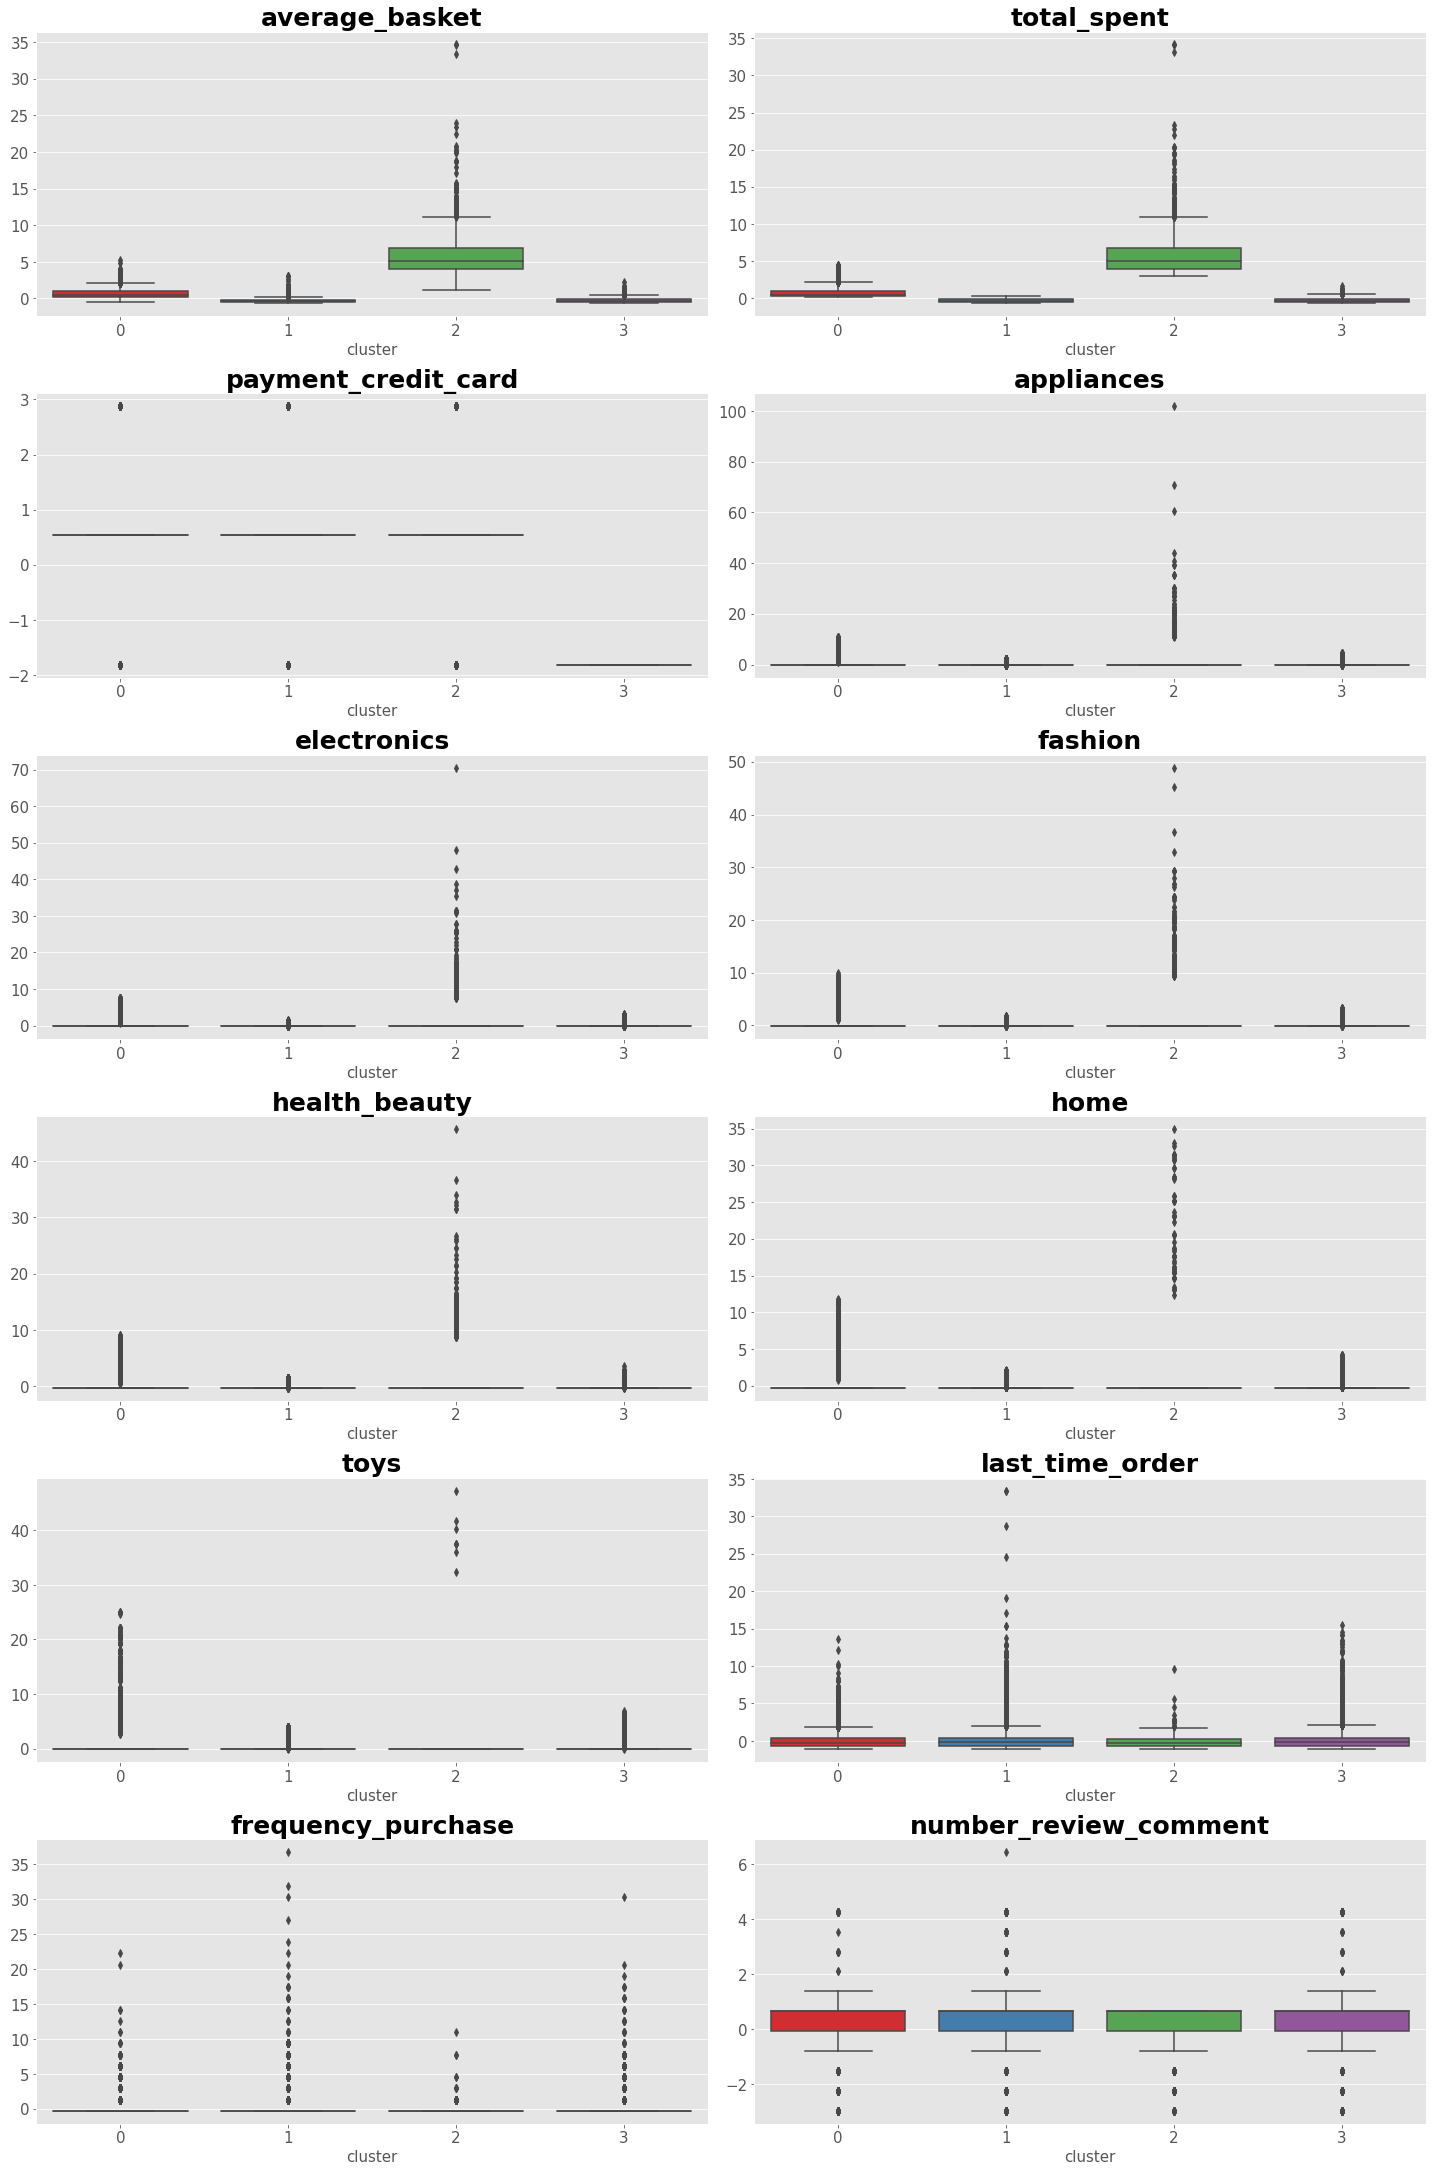

In [60]:
features_kmeans(X, ['average_basket', 'total_spent', 'last_time_order', 'payment_credit_card',  
                    'frequency_purchase', 'number_review_comment', 'home', 
                    'health_beauty', 'fashion', 'electronics', 'appliances', 'toys'], 
                get_model='KMeans4_X', get_folder='model/')

In [61]:
data_cls(olistbr, get_model='KMeans4_X', get_folder='model/')

average_basket  total_spent  \
customer_unique_id                                              
0000366f3b9a7992bf8c76cfdf3221e2          129.90       141.90   
0000b849f77a49e4a4ce2b2a4ca5be3f           18.90        27.19   
0000f46a3911fa3c0805444483337064           69.00        86.22   
0000f6ccb0745a6a4b88665a16c9f078           25.99        43.62   
0004aac84e0df4da2b147fca70cf8255          180.00       196.89   
...                                          ...          ...   
fe6db9c6a1a30ca55742eaf095e3032a          102.90       120.87   
fe702f5f24b432afd18e24f53feb9bbe          370.47       403.81   
fe713394dfe3e40c4e5a6fc3ed017080           39.90        61.05   
fe71393e06baa2636d75e3bd65c10e0a          199.90       216.05   
fe723a20cfca7bef0e6b4e7f2fe1c802           99.90       113.15   

                                  max_order_amount  min_order_amount  \
customer_unique_id                                                     
0000366f3b9a7992bf8c76cfdf3221e2            129.90            129.90   
0000b849f77a49e4a4ce2b2a4ca5be3f             18.90             18.90   
0000f46a3911fa3c0805444483337064             69.00             69.00   
0000f6ccb0745a6a4b88665a16c9f078             25.99             25.99   
0004aac84e0df4da2b147fca70cf8255            180.00            180.00   
...                                            ...               ...   
fe6db9c6a1a30ca55742eaf095e3032a            102.90            102.90   
fe702f5f24b432afd18e24f53feb9bbe            370.47            370.47   
fe713394dfe3e40c4e5a6fc3ed017080             39.90             39.90   
fe71393e06baa2636d75e3bd65c10e0a            199.90            199.90   
fe723a20cfca7bef0e6b4e7f2fe1c802             99.90             99.90   

                                  number_of_products_purchased  \
customer_unique_id                                               
0000366f3b9a7992bf8c76cfdf3221e2                           1.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                           1.0   
0000f46a3911fa3c0805444483337064                           1.0   
0000f6ccb0745a6a4b88665a16c9f078                           1.0   
0004aac84e0df4da2b147fca70cf8255                           1.0   
...                                                        ...   
fe6db9c6a1a30ca55742eaf095e3032a                           1.0   
fe702f5f24b432afd18e24f53feb9bbe                           1.0   
fe713394dfe3e40c4e5a6fc3ed017080                           1.0   
fe71393e06baa2636d75e3bd65c10e0a                           1.0   
fe723a20cfca7bef0e6b4e7f2fe1c802                           1.0   

                                  bucket_quartile_lower25  \
customer_unique_id                                          
0000366f3b9a7992bf8c76cfdf3221e2                      0.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                      1.0   
0000f46a3911fa3c0805444483337064                      0.0   
0000f6ccb0745a6a4b88665a16c9f078                      1.0   
0004aac84e0df4da2b147fca70cf8255                      0.0   
...                                                   ...   
fe6db9c6a1a30ca55742eaf095e3032a                      0.0   
fe702f5f24b432afd18e24f53feb9bbe                      0.0   
fe713394dfe3e40c4e5a6fc3ed017080                      0.0   
fe71393e06baa2636d75e3bd65c10e0a                      0.0   
fe723a20cfca7bef0e6b4e7f2fe1c802                      0.0   

                                  bucket_quartile_25_50  \
customer_unique_id                                        
0000366f3b9a7992bf8c76cfdf3221e2                    0.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                    0.0   
0000f46a3911fa3c0805444483337064                    1.0   
0000f6ccb0745a6a4b88665a16c9f078                    0.0   
0004aac84e0df4da2b147fca70cf8255                    0.0   
...                                                 ...   
fe6db9c6a1a30ca55742eaf095e3032a                    0.0   
fe702f5f24b432afd18e24f53feb9bbe                    0.0   
fe713394

In [62]:
cluster_count = data_cls(X, get_model='KMeans4_X', get_folder='model/').groupby('cluster').mean()
cluster_count['%spent'] = cluster_count['state_SP'].apply(lambda x: 100*x/cluster_count['total_spent'].sum())
cluster_count

average_basket  total_spent  max_order_amount  min_order_amount  \
cluster                                                                    
0              0.718690     0.747816          0.725622          0.725622   
1             -0.319058    -0.328463         -0.321766         -0.321766   
2              6.032389     6.006376          6.045335          6.045335   
3             -0.244927    -0.245112         -0.245160         -0.245160   

         number_of_products_purchased  bucket_quartile_lower25  \
cluster                                                          
0                                 0.0                -0.576178   
1                                 0.0                 0.165494   
2                                 0.0                -0.576178   
3                                 0.0                 0.159362   

         bucket_quartile_25_50  bucket_quartile_50_75  \
cluster                                                 
0                    -0.579007              -0.575800   
1                     0.196578               0.216797   
2                    -0.579007              -0.575800   
3                     0.058165               0.002053   

         bucket_quartile_upper75  payment_boleto  payment_credit_card  \
cluster                                                                 
0                       1.729108       -0.388576             0.410710   
1                      -0.578247       -0.498848             0.484465   
2                       1.729108       -0.164805             0.207461   
3                      -0.219311        1.829274            -1.815113   

         payment_debit_card  payment_voucher  appliances      auto  \
cluster                                                              
0                 -0.083158        -0.015560    0.096692  0.145560   
1                 -0.125022         0.054966   -0.060353 -0.065345   
2                  0.000966         0.002420    1.841287  1.216564   
3                  0.442790        -0.136734   -0.055689 -0.046226   

         construction   culture  electronics   fashion      food    garden  \
cluster                                                                      
0            0.138323  0.015707     0.132189  0.259486  0.009286  0.057590   
1           -0.055215 -0.009308    -0.101155 -0.112884 -0.001904 -0.044499   
2            0.849145  0.215873     2.768717  2.168807 -0.070867  1.335479   
3           -0.041978 -0.004472    -0.042429 -0.097992  0.000472 -0.030041   

         health_beauty   hobbies      home    office    others      pets  \
cluster                                                                    
0             0.314059  0.027749  0.252167  0.170737  0.239546  0.063573   
1            -0.117862 -0.037329 -0.084564 -0.066345 -0.078244 -0.022590   
2             1.919988  1.515936  0.840702  0.598635  0.496141  0.394565   
3            -0.117826 -0.028842 -0.071614 -0.024462 -0.054214 -0.026275   

         sports_leisure      toys  last_time_order  frequency_purchase  \
cluster                                                                  
0              0.163818  0.191488        -0.076376           -0.110436   
1             -0.072019 -0.049133         0.018651            0.033209   
2              1.277892  0.096880        -0.136100           -0.200912   
3             -0.048438 -0.059123         0.041668            0.039029   

         number_review_comment  state_MG  state_PR  state_RJ  state_RS  \
cluster                                                                  
0                    -0.018408  0.117425  0.049285  0.138218  0.053475   
1                     0.002791  0.117643  0.050088  0.131943  0.051578   
2                    -0.079660  0.120830  0.048925  0.143810  0.051149   
3                     0.007141  0.115729  0.055376  0.109429  0.068135   

         state_SP  state_other    %spent  
cluster                                   
0        0.352852     0.288745  5.709006  
1      

**Cluster 0 :** 1,6% des ventes avec des clients au pouvoir d'achat plus élevé, et particulièrement intéressés par les secteurs des technologies et de la mode.

**Cluster 1 :** 23,8% des ventes toujours avec des clients qui dépensent plus que les autres, mais très axés sur les produits en rapport avec les soins du corps.

**Cluster 2 :** 9,4% des ventes pour des clients peu dépensiers, de faibles montants d'achat, pour des produits de l'univers de l'indoor.

**Cluster 3 :** 65,2% des ventes, le plus grand groupe de clients qui s'intéressent à plusieurs familles de produits, sans réelles préférences.


Quelque soit le groupe, la tendance générale est au One-Shot, sans fidélisation, faible fréquence d'achat, etc… Un problème de clients très volatiles, qui semblent intéresser par un achat soit coup de coeur, soit par une bonne affaire à un instant t.

### Nouveau Clustering KMeans sur la plus grande partition 
L'objectif ici est de "creuser" le cluster le plus important afin d'en savoir plus sur les éventuelles similitudes de sa population. Pouvons-nous découvrir des niches? 

In [79]:
data_cls3 = data_cls(X, get_model='KMeans4_X', get_folder='model/')
data_cls3 = data_cls3 [data_cls3 ['cluster'] == 1]
data_cls3.drop(columns='cluster', inplace=True)
data_cls3.name = "data_cls3"
display(data_cls3.shape)
display(data_cls3.head())

(53705, 38)

average_basket  total_spent  \
customer_unique_id                                              
0000366f3b9a7992bf8c76cfdf3221e2        0.018712    -0.024278   
0000b849f77a49e4a4ce2b2a4ca5be3f       -0.563991    -0.602260   
0000f46a3911fa3c0805444483337064       -0.300987    -0.304829   
0000f6ccb0745a6a4b88665a16c9f078       -0.526772    -0.519475   
0005e1862207bf6ccc02e4228effd9a0        0.045485     0.017139   

                                  max_order_amount  min_order_amount  \
customer_unique_id                                                     
0000366f3b9a7992bf8c76cfdf3221e2          0.018085          0.018085   
0000b849f77a49e4a4ce2b2a4ca5be3f         -0.562543         -0.562543   
0000f46a3911fa3c0805444483337064         -0.300476         -0.300476   
0000f6ccb0745a6a4b88665a16c9f078         -0.525456         -0.525456   
0005e1862207bf6ccc02e4228effd9a0          0.044762          0.044762   

                                  number_of_products_purchased  \
customer_unique_id                                               
0000366f3b9a7992bf8c76cfdf3221e2                           0.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                           0.0   
0000f46a3911fa3c0805444483337064                           0.0   
0000f6ccb0745a6a4b88665a16c9f078                           0.0   
0005e1862207bf6ccc02e4228effd9a0                           0.0   

                                  bucket_quartile_lower25  \
customer_unique_id                                          
0000366f3b9a7992bf8c76cfdf3221e2                -0.576178   
0000b849f77a49e4a4ce2b2a4ca5be3f                 1.735574   
0000f46a3911fa3c0805444483337064                -0.576178   
0000f6ccb0745a6a4b88665a16c9f078                 1.735574   
0005e1862207bf6ccc02e4228effd9a0                -0.576178   

                                  bucket_quartile_25_50  \
customer_unique_id                                        
0000366f3b9a7992bf8c76cfdf3221e2              -0.579007   
0000b849f77a49e4a4ce2b2a4ca5be3f              -0.579007   
0000f46a3911fa3c0805444483337064               1.727094   
0000f6ccb0745a6a4b88665a16c9f078              -0.579007   
0005e1862207bf6ccc02e4228effd9a0              -0.579007   

                                  bucket_quartile_50_75  \
customer_unique_id                                        
0000366f3b9a7992bf8c76cfdf3221e2               1.736714   
0000b849f77a49e4a4ce2b2a4ca5be3f              -0.575800   
0000f46a3911fa3c0805444483337064              -0.575800   
0000f6ccb0745a6a4b88665a16c9f078              -0.575800   
0005e1862207bf6ccc02e4228effd9a0               1.736714   

                                  bucket_quartile_upper75  payment_boleto  \
customer_unique_id                                                          
0000366f3b9a7992bf8c76cfdf3221e2                -0.578333       -0.498848   
0000b849f77a49e4a4ce2b2a4ca5be3f                -0.578333       -0.498848   
0000f46a3911fa3c0805444483337064                -0.578333       -0.498848   
0000f6ccb0745a6a4b88665a16c9f078                -0.578333       -0.498848   
0005e1862207bf6ccc02e4228effd9a0                -0.578333       -0.498848   

                                  payment_credit_card  payment_debit_card  \
customer_unique_id                                                          
0000366f3b9a7992bf8c76cfdf3221e2             0.532952           -0.125173   
0000b849f77a49e4a4ce2b2a4ca5be3f             0.532952           -0.125173   
0000f46a3911fa3c0805444483337064             0.532952           -0.125173   
0000f6ccb0745a6a4b88665a16c9f078             0.532952           -0.125173   
0005e1862207bf6ccc02e4228effd9a0             0.532952           -0.125173   

                                  payment_voucher  appliances      auto  \
customer_unique_id                                                        
0000366f3b9a7992bf8c76cfdf3221e2        -0.136734   -0.123035 -0.110513   
0000b849f77a49e4a4ce2b2a4ca5be3f        -0.136734

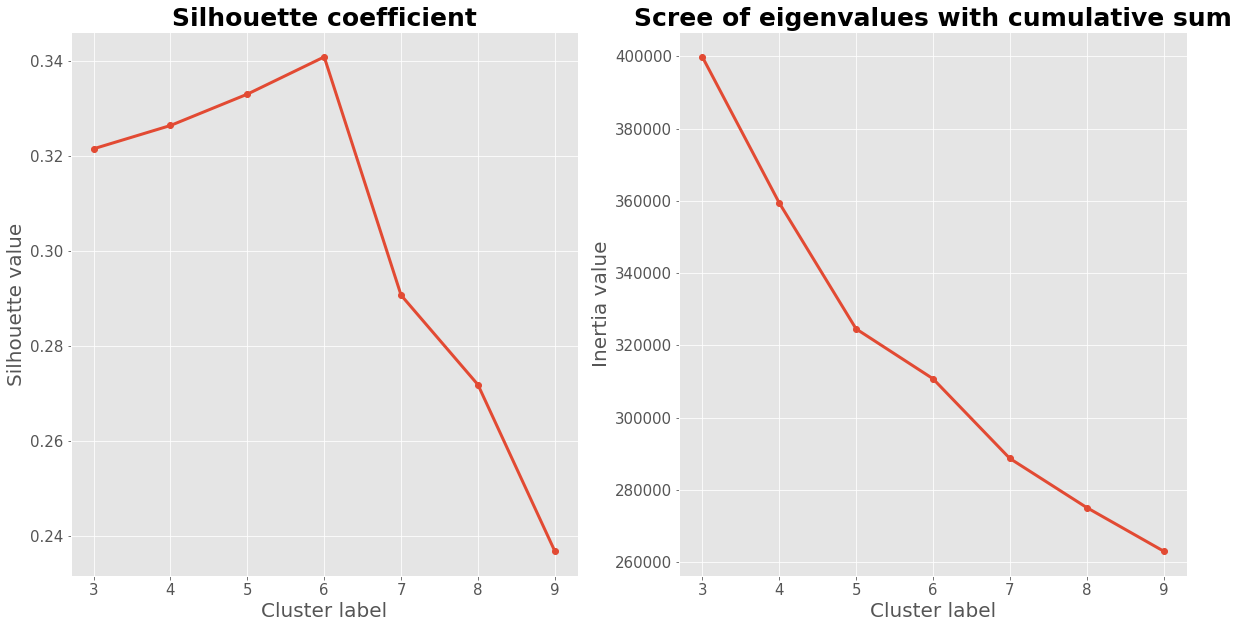

Time: 417.838 seconds


In [80]:
silhouette_inertia(data_cls3)

Il semble pertinent de partitionner les 60% de population (cluster 3) en 4. Voyons si cette segmentation supplémentaire peut apporter des infos complémentaires.

In [81]:
kmeans_model(data_cls3, k=4, folder='model/')

Time: 1.458 seconds


KMeans(n_clusters=4)

c:\Python3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


KMeans Silhouette Score: 0.326
Time pca plot: 66.719 seconds


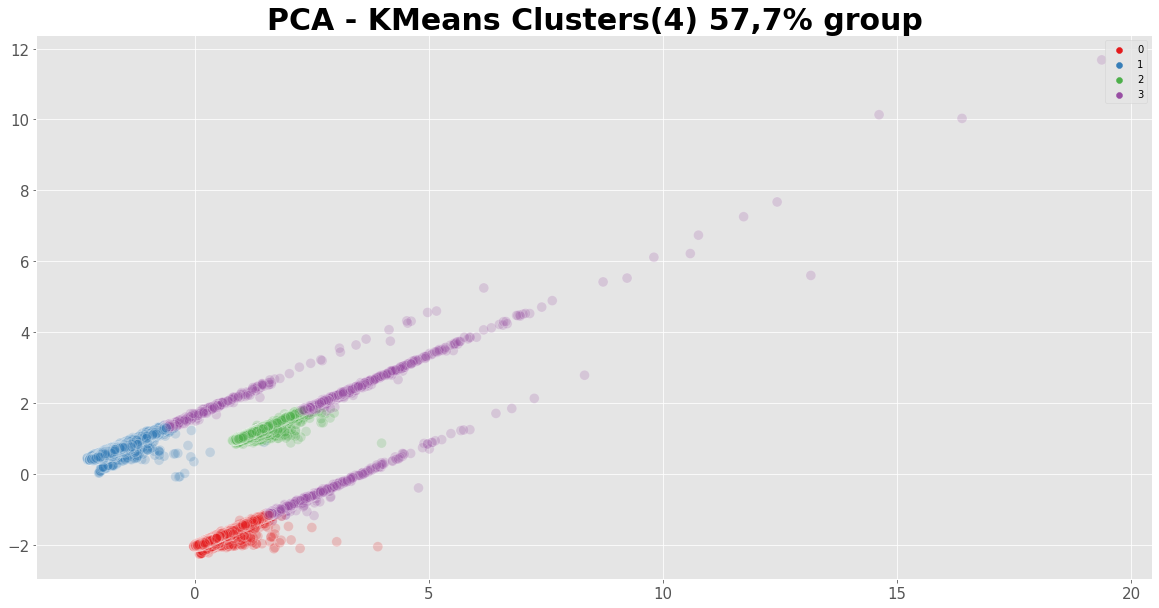

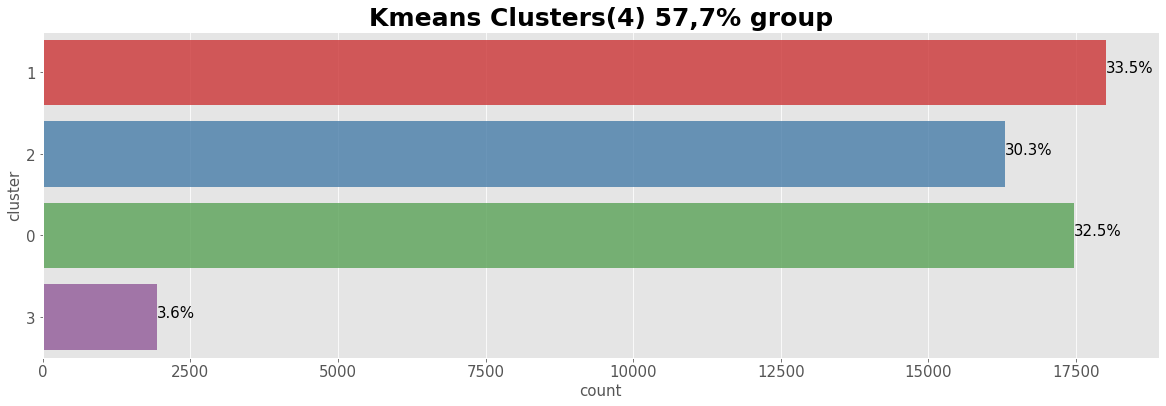

In [82]:
kmeans_clustering_pca(data_cls3, k=4, get_model='KMeans4_data_cls3', get_folder='model/', 
                      add_title='57,7% group')

In [83]:
centroids_cls(data_cls3, get_model='KMeans4_data_cls3', get_folder='model/')[1].T

0         1         2         3
average_basket               -0.350513 -0.105589 -0.515495 -0.367267
total_spent                  -0.359651 -0.104492 -0.534359 -0.397148
max_order_amount             -0.353406 -0.105788 -0.518527 -0.388918
min_order_amount             -0.353406 -0.105788 -0.518527 -0.388918
number_of_products_purchased  0.000000  0.000000  0.000000  0.000000
bucket_quartile_lower25      -0.576178 -0.576178  1.735574  0.543875
bucket_quartile_25_50         1.727094 -0.579007 -0.579007  0.122591
bucket_quartile_50_75        -0.575800  1.736200 -0.575800 -0.089647
bucket_quartile_upper75      -0.578333 -0.578333 -0.578333 -0.575949
payment_boleto               -0.498848 -0.498848 -0.498848 -0.498848
payment_credit_card           0.486456  0.504912  0.457287  0.505057
payment_debit_card           -0.125173 -0.124723 -0.125173 -0.125173
payment_voucher               0.064599  0.022371  0.083084  0.034524
appliances                   -0.055583 -0.037914 -0.088823 -0.072507
auto                         -0.073675 -0.033528 -0.088057 -0.094934
construction                 -0.063240 -0.030684 -0.072742 -0.063435
culture                      -0.017666  0.014678 -0.024246 -0.031239
electronics                  -0.115044 -0.079936 -0.106570 -0.127562
fashion                      -0.119235 -0.072881 -0.147447 -0.136725
food                          0.027573 -0.020195 -0.013101 -0.003624
garden                       -0.027713 -0.030799 -0.081500 -0.012028
health_beauty                -0.124657 -0.030397 -0.198882 -0.188130
hobbies                      -0.035193 -0.035703 -0.041183 -0.039308
home                         -0.089225  0.035834 -0.223965  0.010955
office                       -0.093543  0.011984 -0.122132 -0.079827
others                       -0.100776 -0.012643 -0.121512 -0.120830
pets                         -0.040723  0.037219 -0.065548 -0.053630
sports_leisure               -0.087238  0.011000 -0.144016 -0.100818
toys                         -0.054038  0.011495 -0.104809 -0.100149
last_time_order              -0.079478 -0.115890 -0.101051  3.162813
frequency_purchase           -0.088951 -0.138284 -0.083835  3.715504
number_review_comment         0.003804  0.008619  0.042808 -0.397300
state_MG                      0.121845  0.124250  0.105696  0.118802
state_PR                      0.050821  0.050878  0.048674  0.048037
state_RJ                      0.134322  0.142913  0.116560  0.137913
state_RS                      0.057632  0.052544  0.043150  0.058884
state_SP                      0.420649  0.393079  0.516266  0.427686
state_other                   0.214731  0.236336  0.169654  0.208678

**Cluster 1.0 :** faibles montants d'achats pour ce groupe de clients.

**Cluster 1.1 :** dépenses modérées, des acheteurs aux dépenses moyennes.

**Cluster 1.2 :** clients qui dépensent beaucoup plus que les deux précédents groupes.

**Cluster 1.3 :** une petite niche de clients qui payent uniquement en débit immédiat.

Ce nouveau clustering permet d'identifier des nuances de dépenses, mais aucune distinction sur des préférences d'achat. On peut réellement confirmer que ces acheteurs sont multi-produits, ils portent un intérêt pour des produits de toute sorte.

In [84]:
cluster_count = data_cls(olistbr, get_model='KMeans4_X', get_folder='model/').groupby('cluster').max()
cluster_count['%spent'] = cluster_count['payment_boleto'].apply(lambda x: 100*x/cluster_count['total_spent'].sum())
cluster_count

average_basket  total_spent  max_order_amount  min_order_amount  \
cluster                                                                    
0               6735.00      6929.31           6735.00           6735.00   
1               6729.00      6922.21           6729.00           6729.00   
2               3999.90      4016.91           3999.90           3999.90   
3               2999.89      3042.36           2999.89           2999.89   

         number_of_products_purchased  bucket_quartile_lower25  \
cluster                                                          
0                                 1.0                      1.0   
1                                 1.0                      1.0   
2                                 1.0                      1.0   
3                                 1.0                      1.0   

         bucket_quartile_25_50  bucket_quartile_50_75  \
cluster                                                 
0                          1.0                    1.0   
1                          1.0                    1.0   
2                          1.0                    1.0   
3                          1.0                    1.0   

         bucket_quartile_upper75  payment_boleto  payment_credit_card  \
cluster                                                                 
0                            1.0             1.0                  2.0   
1                            1.0             1.0                  2.0   
2                            1.0             1.0                  2.0   
3                            1.0             1.0                  2.0   

         payment_debit_card  payment_voucher  appliances     auto  \
cluster                                                             
0                       1.0             29.0     6735.00  1999.99   
1                       2.0             18.0     4690.00  2258.00   
2                       1.0             12.0     2338.08  2258.00   
3                       1.0             21.0     2338.08  1999.99   

         construction  culture  electronics  fashion   food  garden  \
cluster                                                               
0             2160.00  1420.00      2649.99   3700.0  570.0  2550.0   
1             3099.90  1165.97      6729.00   2999.0  623.0  3930.0   
2              589.90   549.90      3549.00   3999.9  192.5   525.0   
3             2062.99   524.90      2999.89   2200.0  699.9  2749.0   

         health_beauty  hobbies     home  office   others    pets  \
cluster                                                             
0              2749.65  2109.90  2110.00  1899.0  1964.00  1798.0   
1              3899.00  4399.87  2350.00  3089.0  3109.99  2498.0   
2              2699.00  1990.00  2110.00   598.0  2649.00   530.0   
3              2799.65  2399.00  2199.99  2399.0  2649.00   798.0   

         sports_leisure     toys  last_time_order  frequency_purchase  \
cluster                                                                 
0               4059.00   889.20           4182.0                15.0   
1               3690.00  1699.99           8700.0                24.0   
2               1800.00   749.90           1744.0                 6.0   
3               1698.99  1499.99           4600.0                12.0   

         number_review_comment customer_state    %spent  
cluster                                                  
0                         10.0          other  0.004782  
1                         13.0          other  0.004782  
2                         10.0          other  0.004782  
3                         10.0          other  0.004782

In [85]:
data_cls3_ca1 = pd.DataFrame(data= [[0, 30.4, 7.84, 7.42, 6.50, 2.07, 8.38, 12.65, 1.62, 7.38, 16.82, 3.47, 20.38, 9.46, 5.78,12.50, 9.04], 
                    [1, 32.8, 5.91, 6.65, 6.16, 1.54, 10.02, 10.75, 0.97, 3.24, 12.38, 3.25, 12.15, 8.65, 4.13, 8.79, 5.44],
                    [2, 35, 4.91, 4.17, 4.06, 1.56, 7.80, 7.76, 1.96, 4.00, 4.58, 3.40, 2.84, 0.79, 1.67, 1.26, 0.50],
                    [3, 1.8, 0.27, 0.32, 0.27, 0.02, 0.35, 0.67, 0.19, 0.25, 0.71, 0.17, 0.77, 0.43, 0.05, 0.46, 0.14]], 
             columns=['Cluster', 'CA(%)', 'appliances', 'auto', 'construction', 'culture',
                      'electronics', 'fashion', 'food', 'garden', 'health_beauty', 'hobbies',
                      'home', 'office', 'pets', 'sports_leisure', 'toys']).set_index('Cluster').T
data_cls3_ca1.columns = ['1.0', '1.1', '1.2', '1.3']
data_cls3_ca1

1.0    1.1    1.2   1.3
CA(%)           30.40  32.80  35.00  1.80
appliances       7.84   5.91   4.91  0.27
auto             7.42   6.65   4.17  0.32
construction     6.50   6.16   4.06  0.27
culture          2.07   1.54   1.56  0.02
electronics      8.38  10.02   7.80  0.35
fashion         12.65  10.75   7.76  0.67
food             1.62   0.97   1.96  0.19
garden           7.38   3.24   4.00  0.25
health_beauty   16.82  12.38   4.58  0.71
hobbies          3.47   3.25   3.40  0.17
home            20.38  12.15   2.84  0.77
office           9.46   8.65   0.79  0.43
pets             5.78   4.13   1.67  0.05
sports_leisure  12.50   8.79   1.26  0.46
toys             9.04   5.44   0.50  0.14

In [86]:
data_cls3_ca2 = pd.DataFrame(data= [[0, 7.55, 30.99, 14.81, 1.40], [1, 1.09, 24.45, 15.98, 1.20],
                    [2, 9.07, 20.07, 17.02, 2.92],[3, 3.09, 9.47, 52.82, 0.89]], 
             columns=['Cluster', 'payment_boleto', 'payment_credit_card', 
                      'payment_debit_card', 'payment_voucher']).set_index('Cluster').T
data_cls3_ca2

Cluster                  0      1      2      3
payment_boleto        7.55   1.09   9.07   3.09
payment_credit_card  30.99  24.45  20.07   9.47
payment_debit_card   14.81  15.98  17.02  52.82
payment_voucher       1.40   1.20   2.92   0.89

Notons que la modélisation KMeans reste autant performante sur l'ensemble de la population que sur les 10000 de départ.\
**Testons la stabilité de l'algorithme dans le temps**, puisque la base client dépend directement du temps, elle ne cessera d'augmenter, il est donc nécessaire de démontrer sa stabilité pour les prochains mois, les prochaines années.

In [87]:
X_time = olistbr.copy()
X_time = X_time[X_time.last_time_order > 90]
X_time.shape

(77046, 33)

In [88]:
categorical_columns = X_time.select_dtypes('object').columns
numerical_columns = X_time.drop(columns=categorical_columns).columns

scaler = StandardScaler()
X_time[numerical_columns] = scaler.fit_transform(X_time[numerical_columns])

encoder = OneHotEncoder(sparse=False)
X_categorical = encoder.fit_transform(X_time[categorical_columns])
X_time = pd.merge(X_time[numerical_columns], pd.DataFrame(data = X_categorical, 
                                        columns = encoder.get_feature_names(['state'])).set_index(X_time.index),
                                        left_index = True, right_index = True)

X_time.name = "X_time"
X_time.shape

c:\Python3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(77046, 38)

In [73]:
kmeans_model(X_time, k=4, folder='model/')

Time: 1.561 seconds


KMeans(n_clusters=4)

c:\Python3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


KMeans Silhouette Score: 0.177
Time pca plot: 125.343 seconds


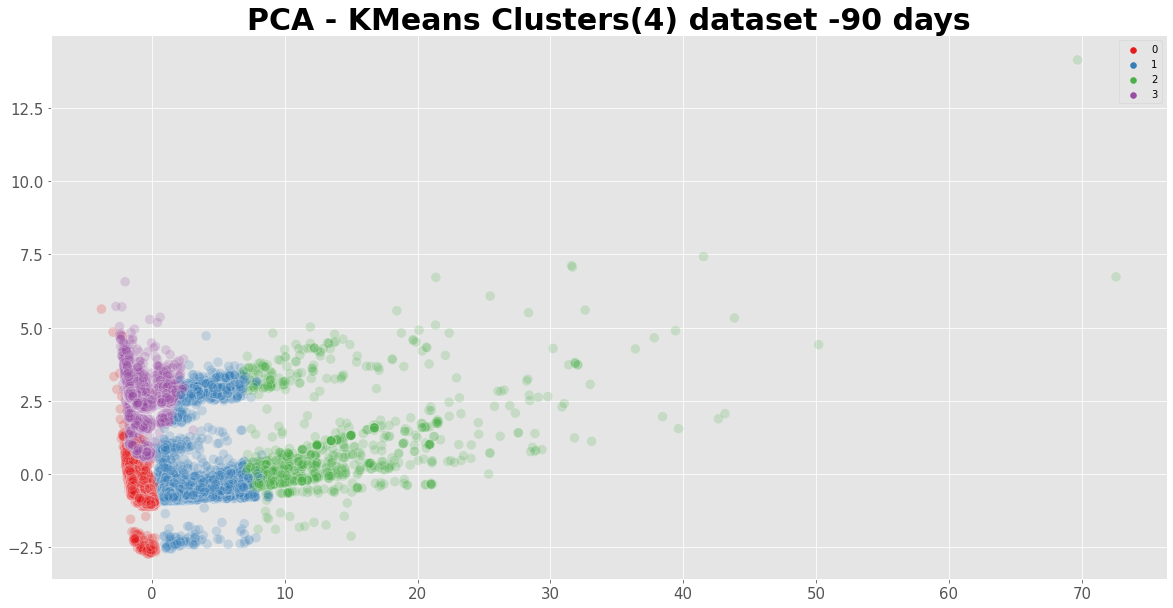

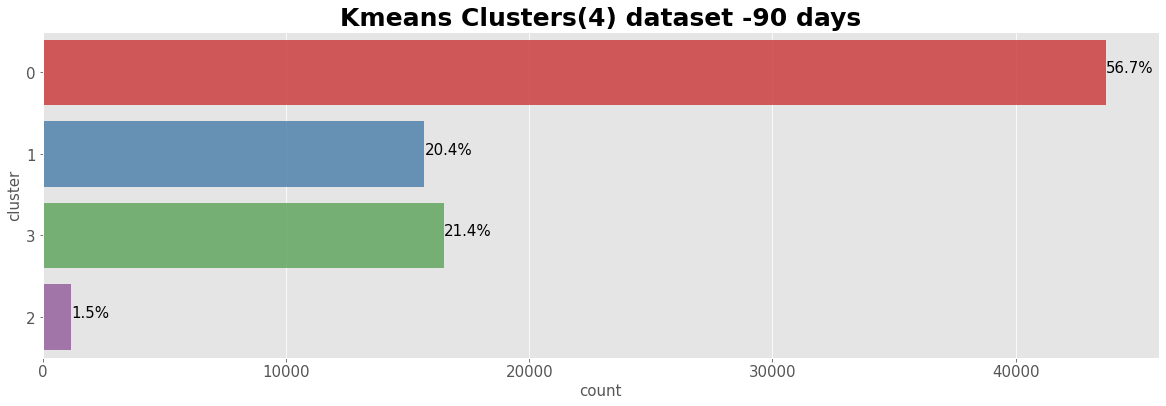

In [74]:
kmeans_clustering_pca(X_time, k=4, get_model='KMeans4_X_time', get_folder='model/', 
                      add_title='dataset -90 days')

La stabilité du clustering en 4 groupes de clients aux profils similaires est satisfaisante dans le temps. Le Kmeans appliqué sur une population tronquée aux plus récentes (-90 jours) retourne des partitions similaires dont le coefficient de silhouette est équivalent.

In [75]:
centroids_cls(X_time, get_model='KMeans4_X_time', get_folder='model/')[1]

average_basket  total_spent  max_order_amount  min_order_amount  \
0       -0.319639    -0.328968         -0.322731         -0.322731   
1        0.729813     0.757894          0.737856          0.737856   
2        5.928933     5.913144          5.944356          5.944356   
3       -0.261413    -0.262305         -0.261949         -0.261949   

   number_of_products_purchased  bucket_quartile_lower25  \
0                           0.0                 0.152951   
1                           0.0                -0.578359   
2                           0.0                -0.578359   
3                           0.0                 0.185315   

   bucket_quartile_25_50  bucket_quartile_50_75  bucket_quartile_upper75  \
0               0.198455               0.222102                -0.574956   
1              -0.582476              -0.573404                 1.738942   
2              -0.582476              -0.573404                 1.738942   
3               0.068967              -0.002945                -0.252305   

   payment_boleto  payment_credit_card  payment_debit_card  payment_voucher  \
0       -0.504028             0.538023           -0.103751        -0.038719   
1       -0.378929             0.399105           -0.074855        -0.028935   
2       -0.149828             0.214856           -0.087096         0.006770   
3        1.706208            -1.820001            0.352150         0.129627   

   appliances      auto  construction   culture  electronics   fashion  \
0   -0.055995 -0.067307     -0.052593 -0.007641    -0.103050 -0.111991   
1    0.091535  0.170211      0.145420  0.009991     0.127083  0.252054   
2    1.647339  0.973225      0.645380  0.249556     2.894730  2.261264   
3   -0.053758 -0.051552     -0.044058 -0.006688    -0.050017 -0.100966   

       food    garden  health_beauty   hobbies      home    office    others  \
0 -0.005247 -0.044039      -0.114829 -0.039093 -0.083553 -0.066725 -0.083200   
1  0.021338  0.060146       0.304580  0.028012  0.266265  0.176887  0.252928   
2 -0.061596  1.313884       1.920777  1.556413  0.641423  0.544077  0.597134   
3 -0.002095 -0.032289      -0.119634 -0.031763 -0.076709 -0.029477 -0.061866   

       pets  sports_leisure      toys  last_time_order  frequency_purchase  \
0 -0.018875       -0.075999 -0.051744         0.013948            0.033556   
1  0.060684        0.174491  0.201428        -0.088652           -0.116118   
2  0.258134        1.297562  0.116457        -0.139474           -0.206773   
3 -0.025743       -0.055244 -0.062648         0.057113            0.035992   

   number_review_comment  state_MG  state_PR  state_RJ  state_RS  state_SP  \
0               0.007142  0.119826  0.049422  0.133943  0.053289  0.431530   
1              -0.020896  0.119042  0.048241  0.142875  0.054231  0.351007   
2              -0.080201  0.114583  0.050347  0.143229  0.054687  0.308160   
3               0.006556  0.114445  0.056313  0.115233  0.067527  0.415106   

   state_other  
0     0.211989  
1     0.284604  
2     0.328993  
3     0.231375

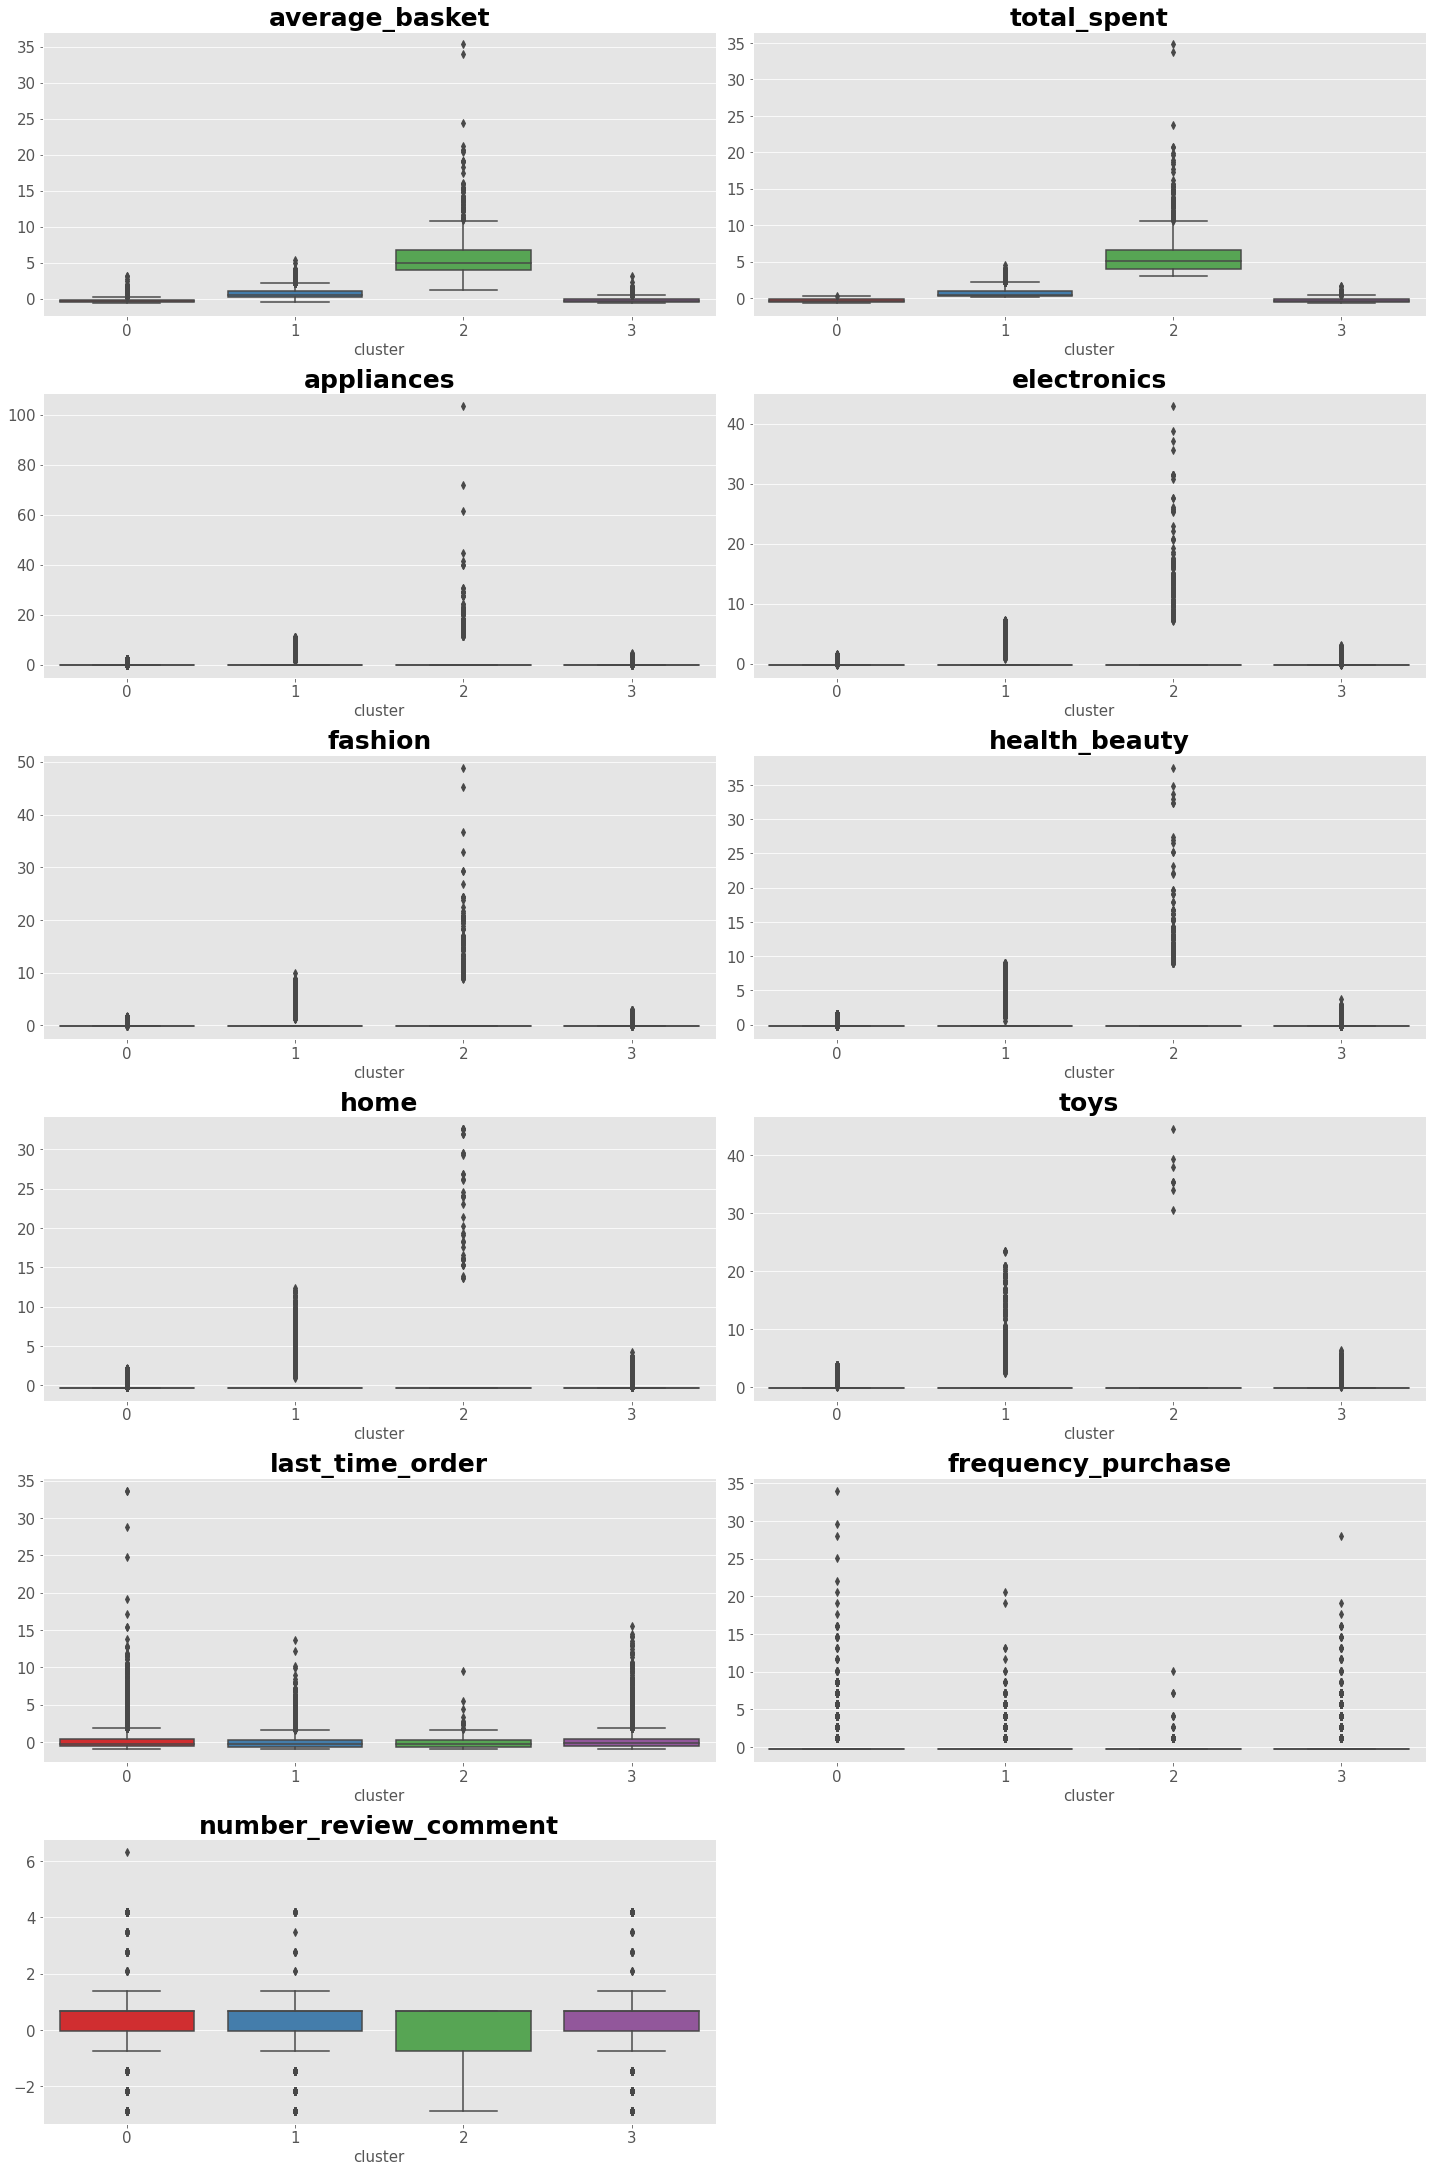

In [76]:
features_kmeans(X_time, ['average_basket', 'total_spent', 'number_orders', 'last_time_order', 
                           'frequency_purchase', 'number_review_comment', 'home', 'health_beauty', 
                           'fashion', 'electronics', 'appliances', 'toys'], 
                get_model='KMeans4_X_time', get_folder='model/')

### Adjusted Rand Index (ARI score)
Vérification de l'ARI score qui permet de mesurer la similitude de nos clusters dans le temps.

L'indice Rand calcule une mesure de similarité entre deux regroupements en considérant toutes les paires d'échantillons et en comptant les paires qui sont attribuées dans le même groupe ou dans des groupes différents dans les regroupements prédits et vrais.

Le score RI brut est ensuite "ajusté pour le hasard" dans le score ARI en utilisant le schéma suivant :

ARI = (RI - Expected_RI) / (max(RI) - Expected_RI)
L'indice de Rand ajusté est ainsi assuré d'avoir une valeur proche de 0,0 pour un étiquetage aléatoire indépendamment du nombre de clusters et d'échantillons et exactement de 1,0 lorsque les clusterings sont identiques (à une permutation près).

In [77]:
pickle.load(open('model/KMeans4_X.pkl', 'rb'))

KMeans(n_clusters=4)

In [78]:
labels_true = pickle.load(open('model/KMeans4_X.pkl', 'rb')).labels_
model_fit = pickle.load(open('model/KMeans4_X.pkl', 'rb')).fit(X)
labels_pred = model_fit.predict(X)

metrics.adjusted_rand_score(labels_pred, labels_true)

0.9552679759666477

## Discussion sur les résultats et propositions d'amélioration

Le contexte métier permet en effet une modélisation par apprentissage non-supervisé, le clustering KMeans ressort comme étant le plus pertinent, le plus stable dans le temps quelque soit les essais effectués. L'ARI score vient également appuyer l'intuition de stabilité évoquée...  Le modèle KMeans retenu permet d'utiliser un .predict() pour établir un update entre deux fréquences de mise à jour (90 jours) pour prendre en compte les nouveaux clients.

Ceci étant, une combinaison complémentaire par segmentation RFM, permettrait de pouvoir comparer les similarités obtenues par Clustering. Rappelons que le clustering passe par de la réduction dimensionnelle qui, dans notre contexte, n'explique que 30% de la variance, à cela s'ajoute des profils de clients atypiques (Montant d'achat élevé) pouvant biaiser les groupes identifiés. Il peut donc être pertinent de procéder en plus par segmentation RFM pour classer les clients en se basant sur des similarités, en opposition au KMeans qui vise à trouver des similarités au sein des clients pour pouvoir les grouper.